In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [3]:
dt_baseball = pd.read_csv('mlbbat10.csv')

In [4]:
dt_baseball

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,B Wood,KC,P,3,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1195,M Wuertz,OAK,P,4,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1196,M Zagurski,PHI,P,7,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1197,B Ziegler,OAK,P,6,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000


### General graph analysis

One of the most importants plays in baseball is hits, so let's see who are the main players who participated in these

In [5]:
dt_baseball.loc[dt_baseball["hit"].sort_values(ascending=False).index].head(12)

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
8,R Cano,NYY,2B,160,626,103,200,41,3,29,109,334,57,77,3,2,0.381,0.534,0.319
34,C Gonzalez,COL,OF,145,587,111,197,34,9,34,117,351,40,135,26,8,0.376,0.598,0.336
24,B Butler,KC,1B,158,595,77,189,45,0,15,78,279,69,78,0,0,0.388,0.469,0.318
30,A Beltre,BOS,3B,154,589,84,189,49,2,28,102,326,40,82,2,1,0.365,0.553,0.321
10,R Braun,MIL,OF,157,619,101,188,45,1,25,103,310,56,105,14,3,0.365,0.501,0.304
6,N Markakis,BAL,OF,160,629,79,187,45,3,12,60,274,73,93,7,2,0.370,0.436,0.297
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
95,J Hamilton,TEX,OF,133,518,95,186,40,3,32,100,328,43,95,8,1,0.411,0.633,0.359
23,M Holliday,STL,OF,158,596,95,186,45,1,28,103,317,69,93,9,5,0.390,0.532,0.312


One of the most important plays in baseball is the home run, so let's find out the statistics in the table about this play

In [6]:
dt_baseball.home_run.describe()

count    1199.000000
mean        3.847373
std         7.372345
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        54.000000
Name: home_run, dtype: float64

Comparing the winner of the ***American League Championship Series*** to the ***National League Championship Series***

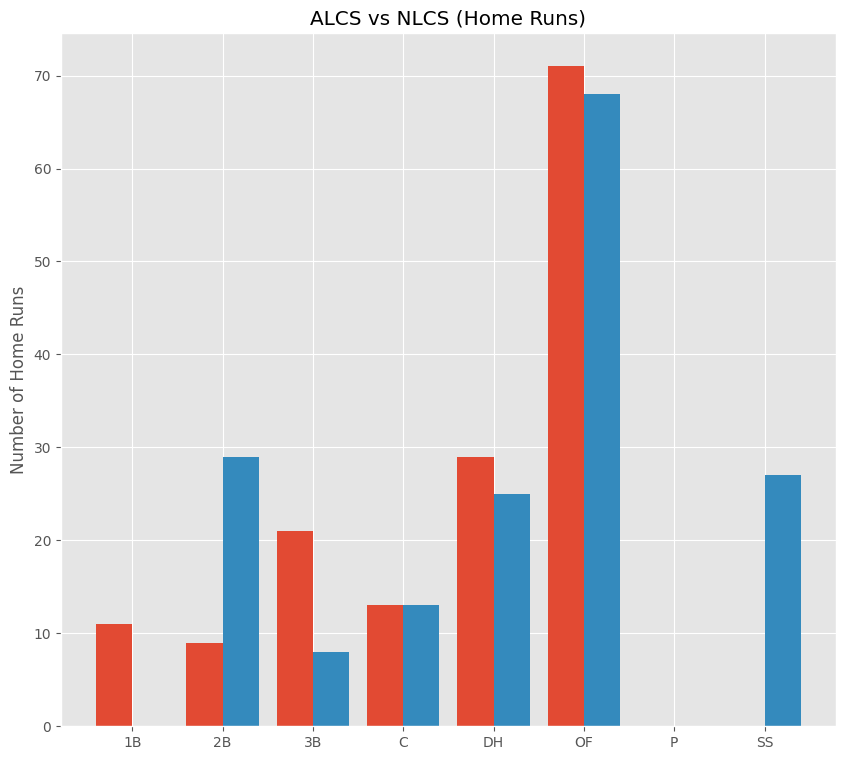

In [7]:
#calculating the values ​​of each champion by position
alcs_champions = dt_baseball.loc[dt_baseball["team"]=="TEX"].groupby(["position"]).sum()
nlcs_champions = dt_baseball.loc[dt_baseball["team"]=="SF"].groupby(["position"]).sum()

#determining the values ​​of home runs by position and the index of the positions that exist
alcs_homerun = alcs_champions["home_run"].values
index_champions = alcs_champions.index
nlcs_homerun = nlcs_champions["home_run"].values

home_run_champions = pd.DataFrame({'alcs': alcs_homerun,
                   'nlcs': nlcs_homerun}, index=index_champions )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

x = np.arange(len(index_champions))

ax.bar(x - 0.40/2, alcs_homerun, width=0.40)
ax.bar(x + 0.40/2, nlcs_homerun, width=0.40)

ax.set_ylabel("Number of Home Runs")
ax.set_title("ALCS vs NLCS (Home Runs)")
ax.set_xticks(x)
ax.set_xticklabels(index_champions)
plt.show()


### Functions for which team analysis

In [8]:
def graph_positions(team):
    fig, ax = plt.subplots(figsize=(10, 9))

    team_dataset = dt_baseball.loc[dt_baseball["team"] == team]

    graph_positions = ax.barh(team_dataset["position"].value_counts().keys(), 
            team_dataset["position"].value_counts(),
            edgecolor="black", linewidth=1.0)
    ax.invert_yaxis()
    ax.set_title("Distribution of positions among the players")
    ax.set_ylabel("Positions")
    ax.set_xlabel("Number of players")
    ax.bar_label(graph_positions, label_type="edge", padding=2)

    output_folder = f"graphs/teams/{team.lower()}"
    filename = f"{team.lower()}-positions"
    full_path = os.path.join(output_folder, filename)
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(full_path, dpi=600, bbox_inches="tight")



In [9]:
def graph_stats_geral(team):

    fig, ax = plt.subplots(figsize=(15, 10))

    team_dataset = dt_baseball.loc[dt_baseball["team"] == team]

    team_dataset.columns[3:]
    team_dataset[team_dataset.columns[3:]].mean()

    graph_stats= ax.barh(team_dataset.columns[3:], team_dataset[team_dataset.columns[3:]].mean(),
    edgecolor="black", linewidth=1.0)

    ax.invert_yaxis()
    ax.set_title("Overall average of the team's main statistics")
    ax.set_ylabel("Statistics")
    ax.bar_label(graph_stats, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(team_dataset.columns[3:], color="black", fontweight="bold")
    ax.set_xlabel("Overall average")

    output_folder = f"graphs/teams/{team.lower()}"
    filename = f"{team.lower()}-overall-statistics"
    full_path = os.path.join(output_folder, filename)
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(full_path, dpi=600, bbox_inches="tight");

### New York Yankees Analysis

The first thing to do is view the statistics of each player on the yankees team.

<Axes: xlabel='name'>

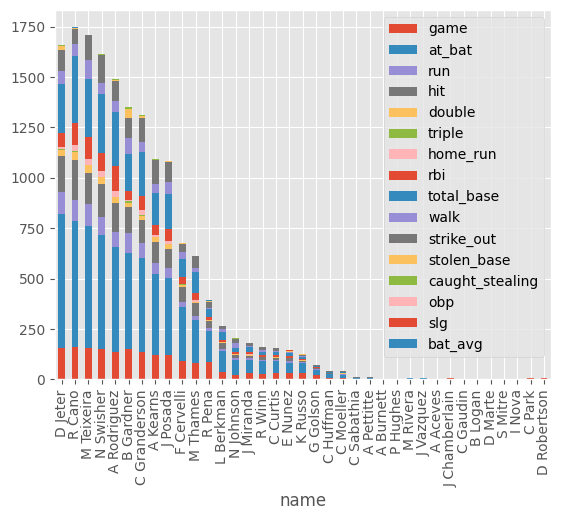

In [10]:
yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"]
yankees.plot(kind="bar", x="name", stacked=True)

I want to analyze the yankees players, how many home runs have the players on this team hit? Who did the most? Who did the least?

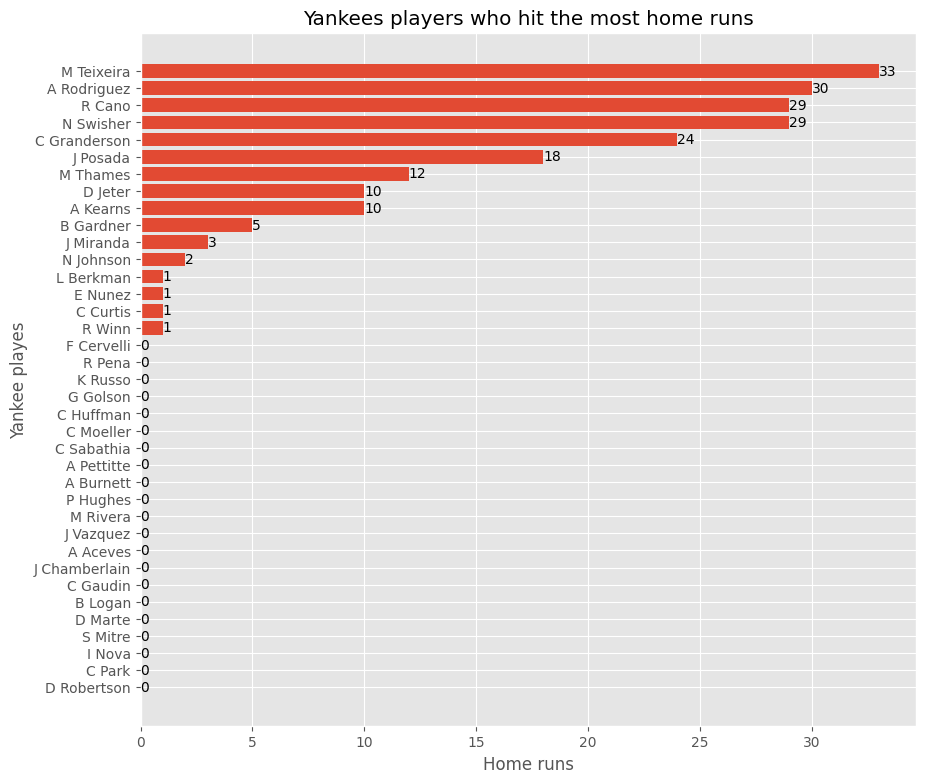

In [11]:
players_yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"].set_index('name').sort_values(by="home_run", ascending=False)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

graph_yankees = ax.barh(players_yankees.index, players_yankees["home_run"])
ax.set_xlabel("Home runs")
ax.set_ylabel("Yankee playes")
ax.invert_yaxis()
ax.bar_label(graph_yankees, label_type="edge");
ax.set_title("Yankees players who hit the most home runs");


Distribution of positions among the players

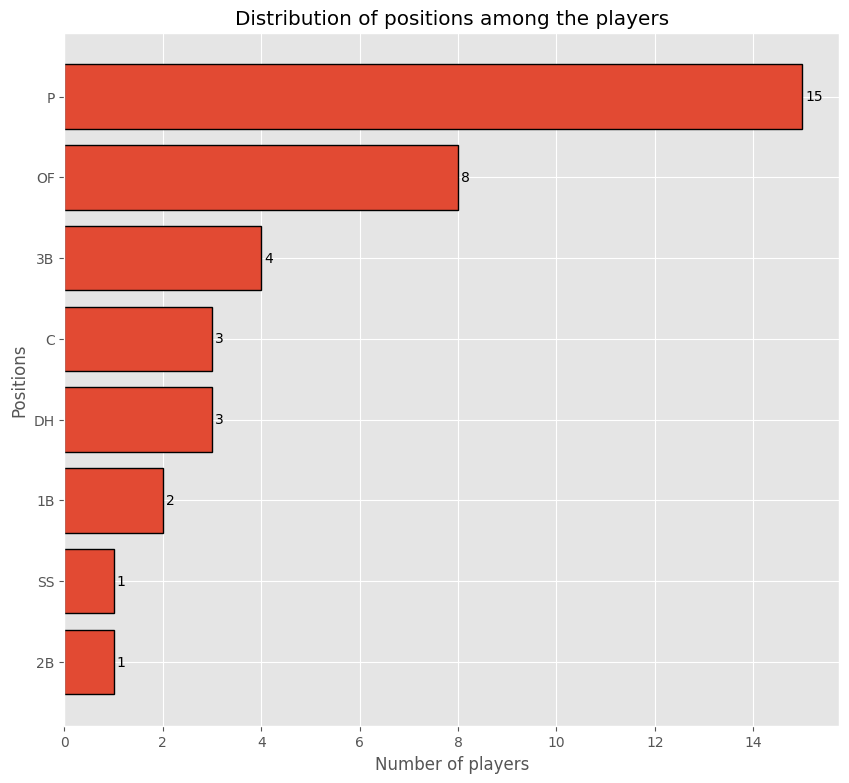

In [12]:
fig, ax = plt.subplots(figsize=(10, 9))

yankees = dt_baseball.loc[dt_baseball["team"] == "NYY"]

graph_positions_nyy = ax.barh(yankees["position"].value_counts().keys(), 
        yankees["position"].value_counts(),
        edgecolor="black", linewidth=1.0)
ax.invert_yaxis()
ax.set_title("Distribution of positions among the players")
ax.set_ylabel("Positions")
ax.set_xlabel("Number of players")
ax.bar_label(graph_positions_nyy, label_type="edge", padding=2)

output_folder = "graphs/teams/nyy"
filename = "yankees-positions"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")

Overall average of the team's main statistics

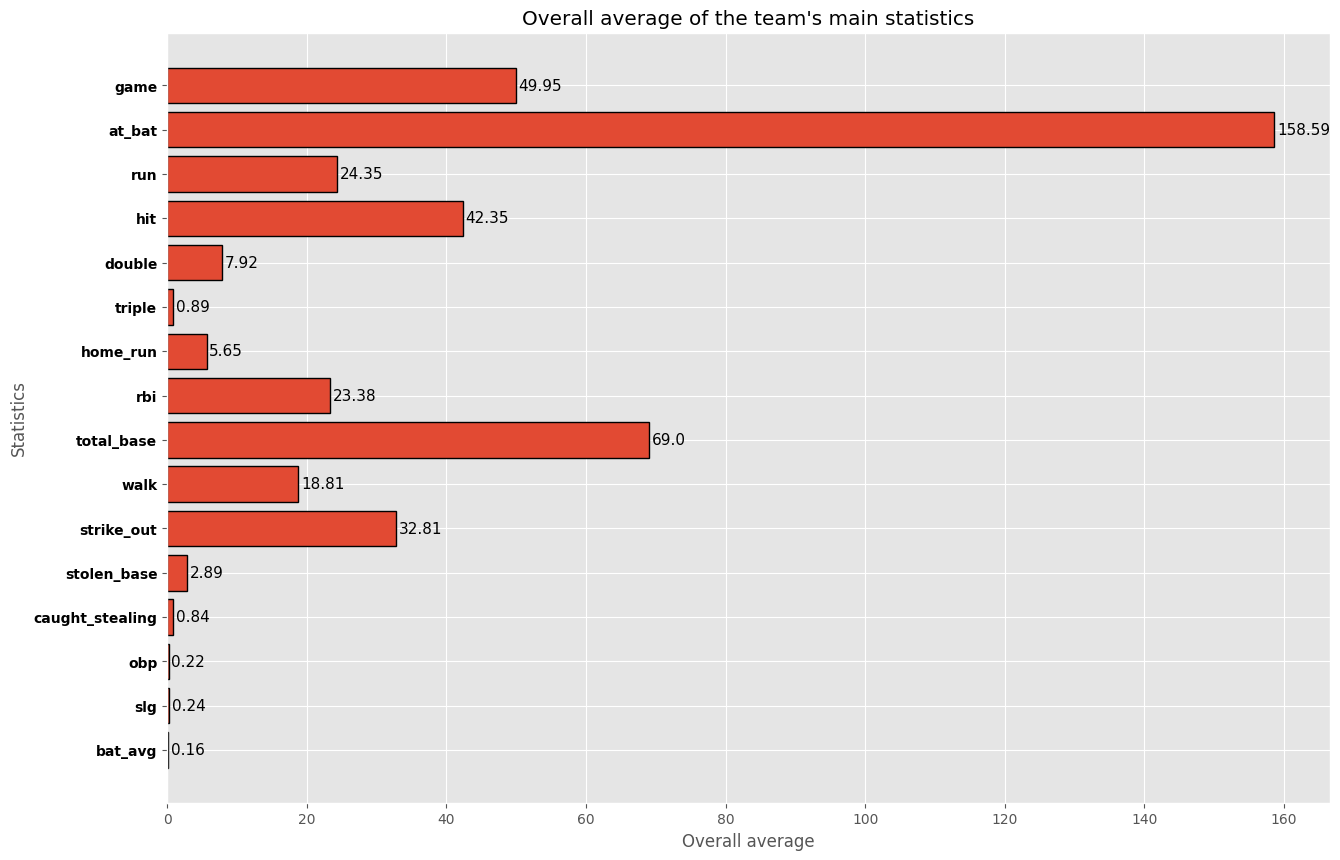

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

yankees.columns[3:]
yankees[yankees.columns[3:]].mean()

graph_stats_nyy = ax.barh(yankees.columns[3:], yankees[yankees.columns[3:]].mean(),
        edgecolor="black", linewidth=1.0)

ax.invert_yaxis()
ax.set_title("Overall average of the team's main statistics")
ax.set_ylabel("Statistics")
ax.bar_label(graph_stats_nyy, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(yankees.columns[3:], color="black", fontweight="bold")
ax.set_xlabel("Overall average")

output_folder = "graphs/teams/nyy"
filename = "yankees-overall-statistics"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight");

### Cleveland Guardians Analysis

Distribution of positions among the players

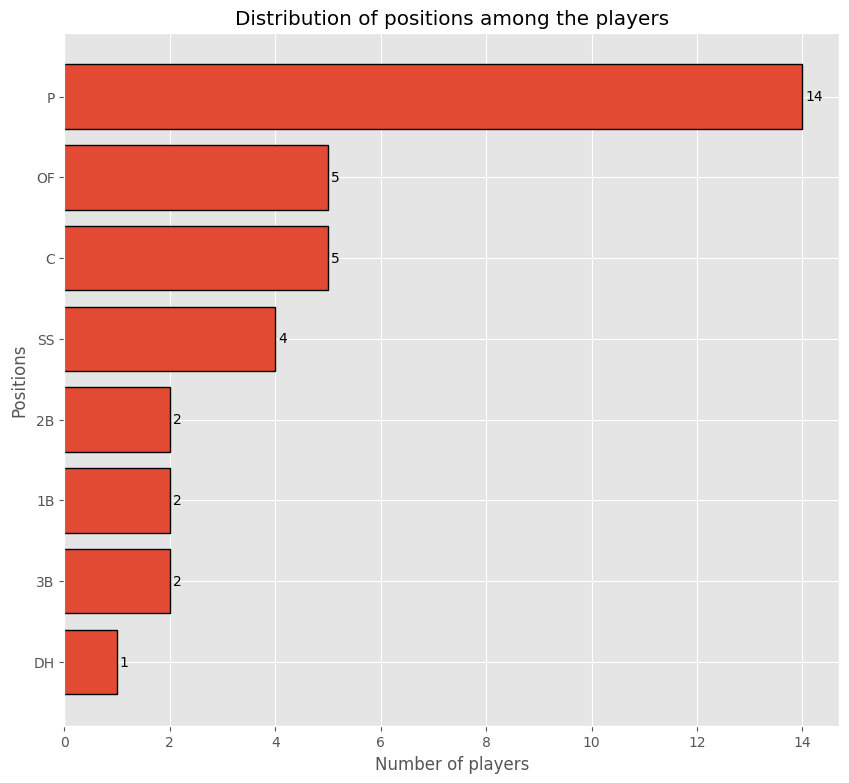

In [14]:
fig, ax = plt.subplots(figsize=(10, 9))

cleveland = dt_baseball.loc[dt_baseball["team"] == "CLE"]

graph_positions_cle = ax.barh(cleveland["position"].value_counts().keys(), 
        cleveland["position"].value_counts(),
        edgecolor="black", linewidth=1.0)
ax.invert_yaxis()
ax.set_title("Distribution of positions among the players")
ax.set_ylabel("Positions")
ax.set_xlabel("Number of players")
ax.bar_label(graph_positions_cle, label_type="edge", padding=2)

output_folder = "graphs/teams/cle"
filename = "cleveland-positions"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")


Overall average of the team's main statistics

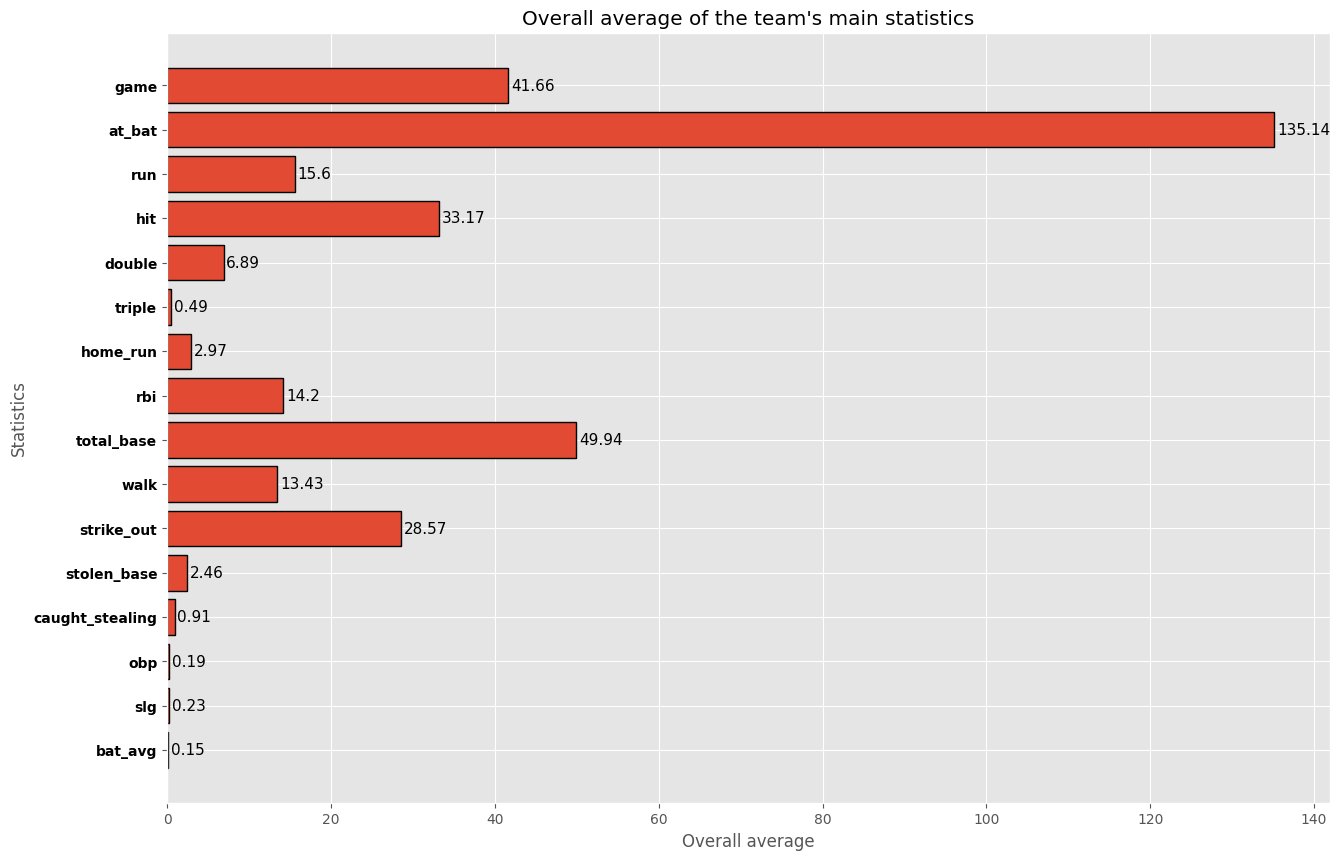

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

cleveland.columns[3:]
cleveland[cleveland.columns[3:]].mean()

graph_stats_cle = ax.barh(cleveland.columns[3:], cleveland[cleveland.columns[3:]].mean(),
        edgecolor="black", linewidth=1.0)

ax.invert_yaxis()
ax.set_title("Overall average of the team's main statistics")
ax.set_ylabel("Statistics")
ax.bar_label(graph_stats_cle, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(cleveland.columns[3:], color="black", fontweight="bold")
ax.set_xlabel("Overall average")

output_folder = "graphs/teams/cle"
filename = "cleveland-overall-statistics"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight");

### Oakland Athletics Analysis

Distribution of positions among the players

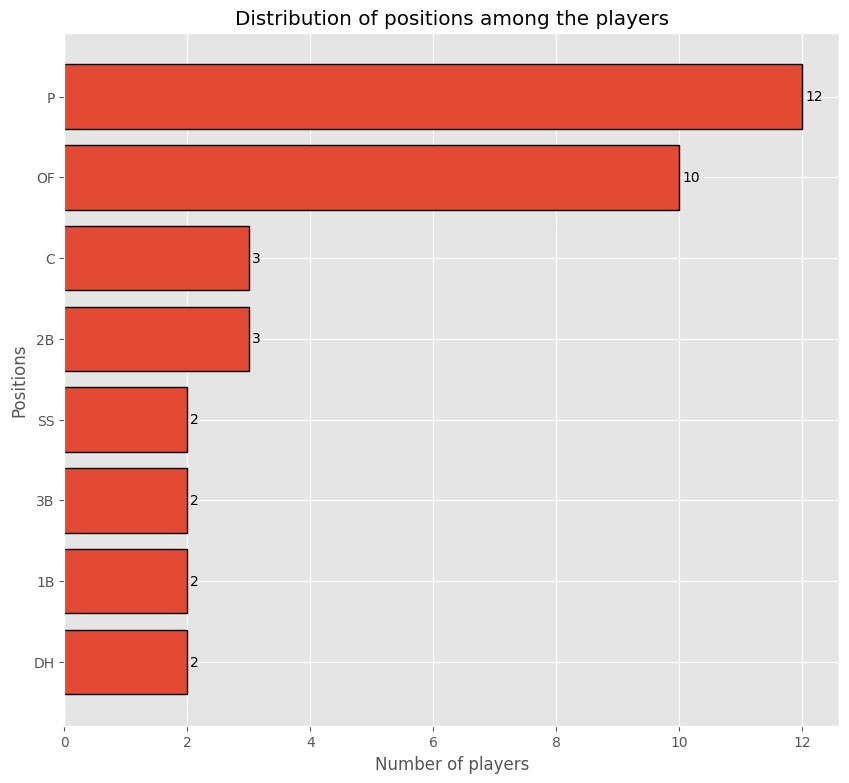

In [16]:
fig, ax = plt.subplots(figsize=(10, 9))

oakland = dt_baseball.loc[dt_baseball["team"] == "OAK"]

graph_positions_oak = ax.barh(oakland["position"].value_counts().keys(), 
        oakland["position"].value_counts(),
        edgecolor="black", linewidth=1.0)
ax.invert_yaxis()
ax.set_title("Distribution of positions among the players")
ax.set_ylabel("Positions")
ax.set_xlabel("Number of players")
ax.bar_label(graph_positions_oak, label_type="edge", padding=2)

output_folder = "graphs/teams/oak"
filename = "oakland-positions"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")


Overall average of the team's main statistics

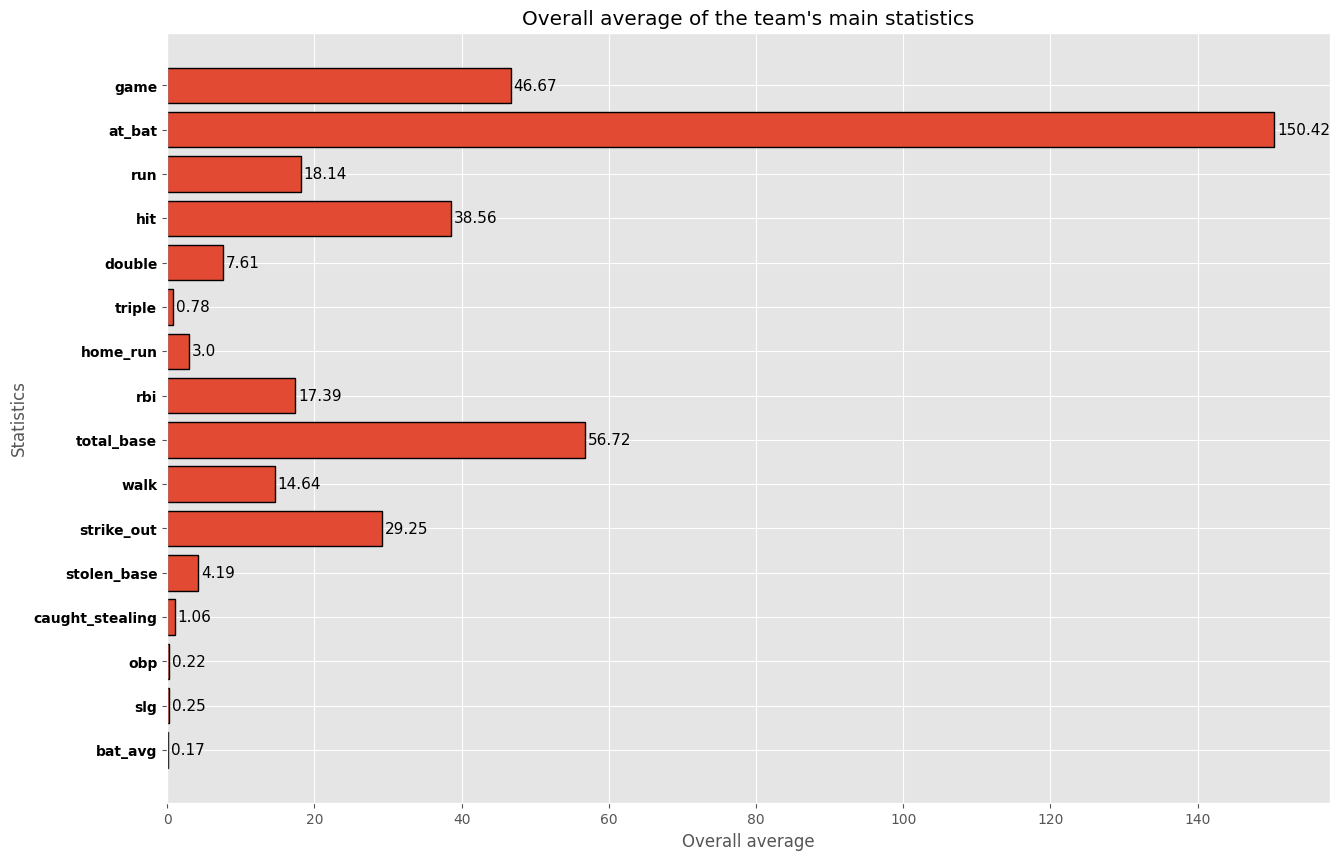

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))

oakland.columns[3:]
oakland[oakland.columns[3:]].mean()

graph_stats_oak = ax.barh(oakland.columns[3:], oakland[oakland.columns[3:]].mean(),
        edgecolor="black", linewidth=1.0)

ax.invert_yaxis()
ax.set_title("Overall average of the team's main statistics")
ax.set_ylabel("Statistics")
ax.bar_label(graph_stats_oak, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(oakland.columns[3:], color="black", fontweight="bold")
ax.set_xlabel("Overall average")

output_folder = "graphs/teams/oak"
filename = "oakland-overall-statistics"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight");

### Seattle Mariners Analysis

Distribution of positions among the players

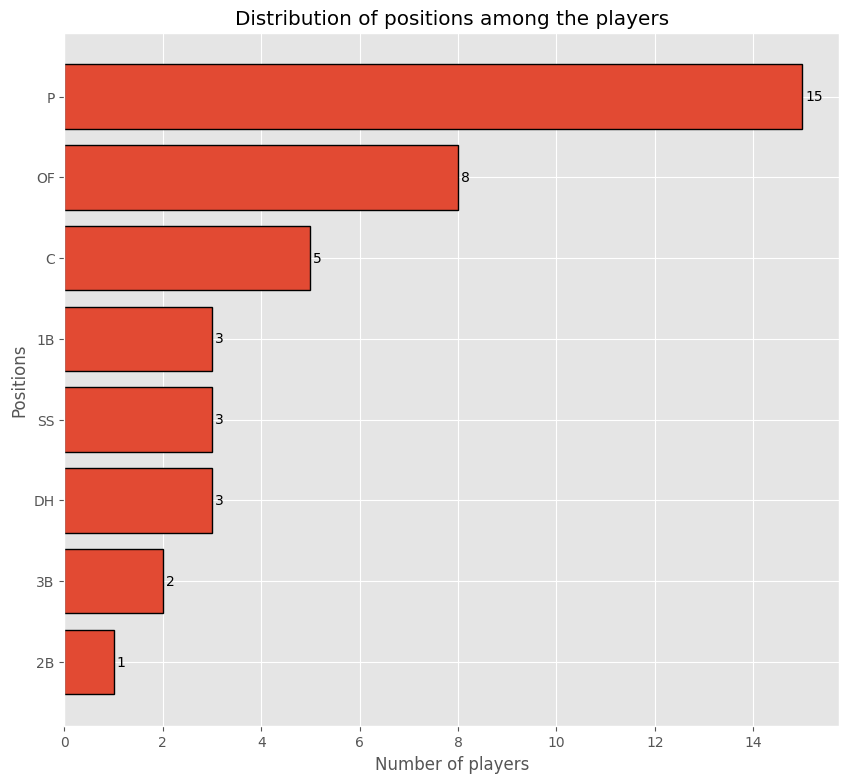

In [18]:
fig, ax = plt.subplots(figsize=(10, 9))

seattle_mariners = dt_baseball.loc[dt_baseball["team"] == "SEA"]

graph_positions_sea = ax.barh(seattle_mariners["position"].value_counts().keys(), 
        seattle_mariners["position"].value_counts(),
        edgecolor="black", linewidth=1.0)
ax.invert_yaxis()
ax.set_title("Distribution of positions among the players")
ax.set_ylabel("Positions")
ax.set_xlabel("Number of players")
ax.bar_label(graph_positions_sea, label_type="edge", padding=2)

output_folder = "graphs/teams/sea"
filename = "seattle-mariners-positions"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")


Overall average of the team's main statistics

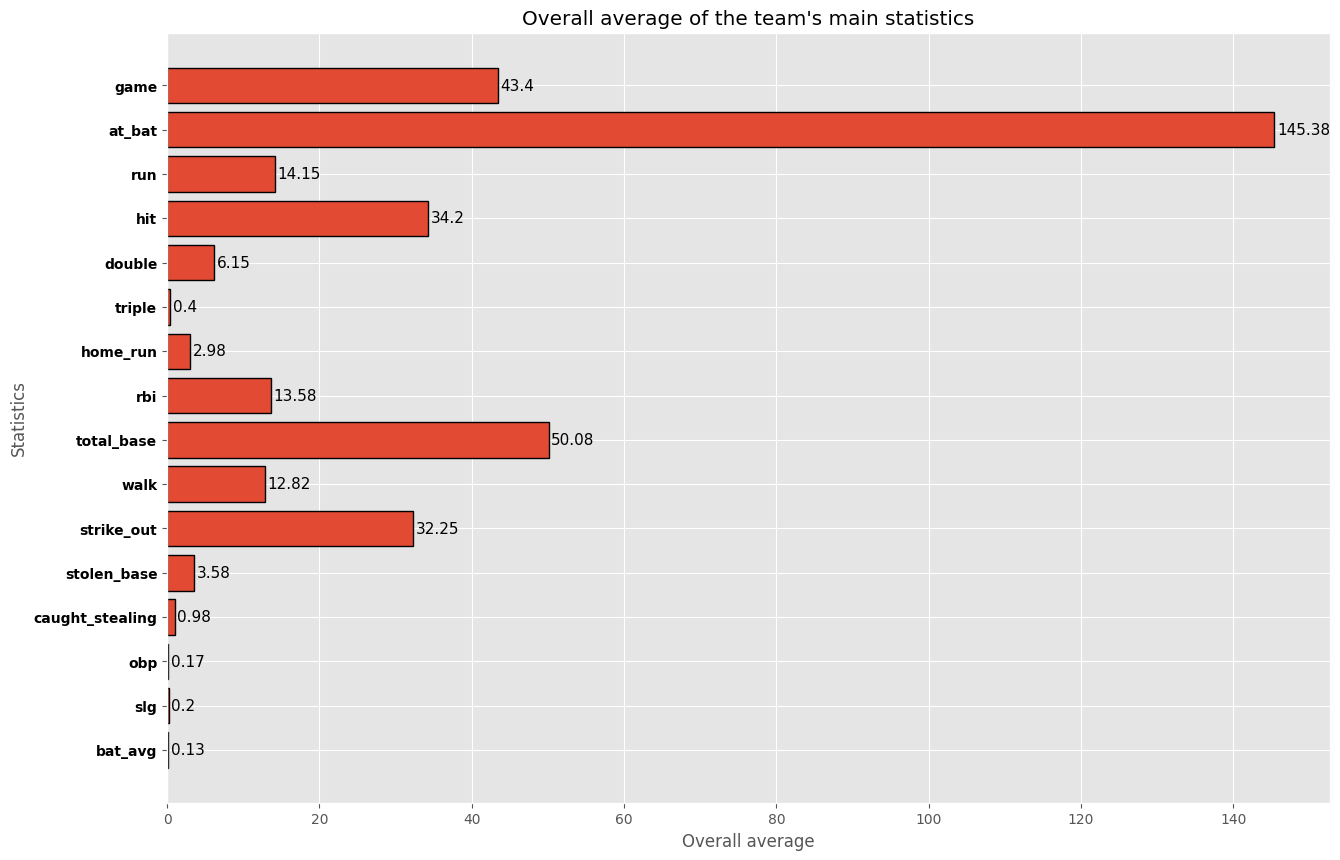

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))

seattle_mariners.columns[3:]
seattle_mariners[seattle_mariners.columns[3:]].mean()

graph_stats_sea = ax.barh(seattle_mariners.columns[3:], seattle_mariners[seattle_mariners.columns[3:]].mean(),
        edgecolor="black", linewidth=1.0)

ax.invert_yaxis()
ax.set_title("Overall average of the team's main statistics")
ax.set_ylabel("Statistics")
ax.bar_label(graph_stats_sea, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(seattle_mariners.columns[3:], color="black", fontweight="bold")
ax.set_xlabel("Overall average")

output_folder = "graphs/teams/sea"
filename = "seattle-mariners-overall-statistics"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight");

### Texas Rangers Analysis

Distribution of positions among the players

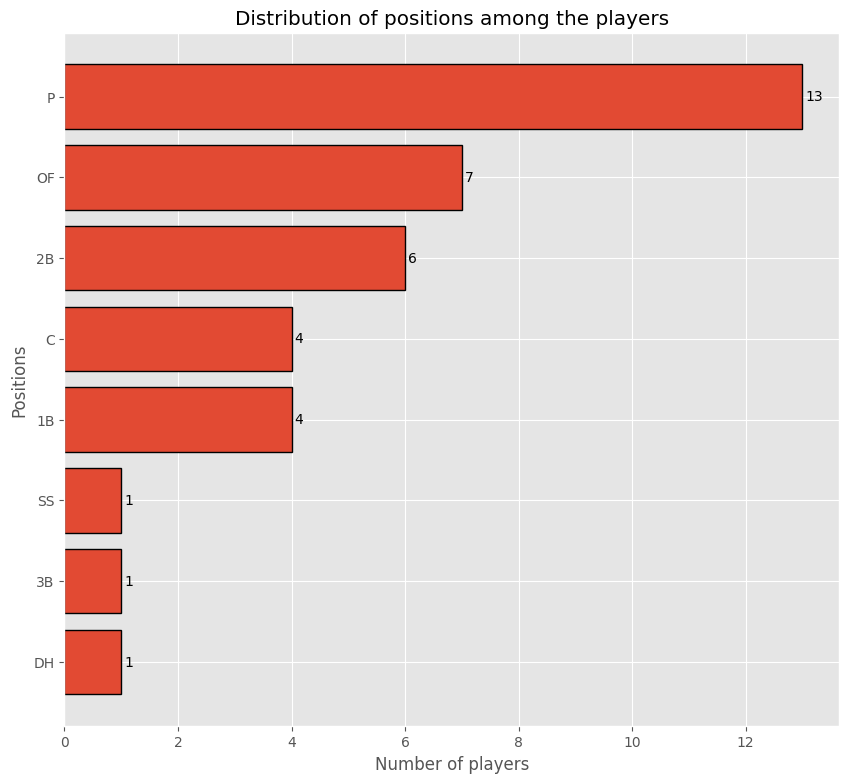

In [20]:
fig, ax = plt.subplots(figsize=(10, 9))

texas_rangers = dt_baseball.loc[dt_baseball["team"] == "TEX"]

graph_positions_tex = ax.barh(texas_rangers["position"].value_counts().keys(), 
        texas_rangers["position"].value_counts(),
        edgecolor="black", linewidth=1.0)
ax.invert_yaxis()
ax.set_title("Distribution of positions among the players")
ax.set_ylabel("Positions")
ax.set_xlabel("Number of players")
ax.bar_label(graph_positions_tex, label_type="edge", padding=2)

output_folder = "graphs/teams/tex"
filename = "texas-rangers-positions"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")

Overall average of the team's main statistics

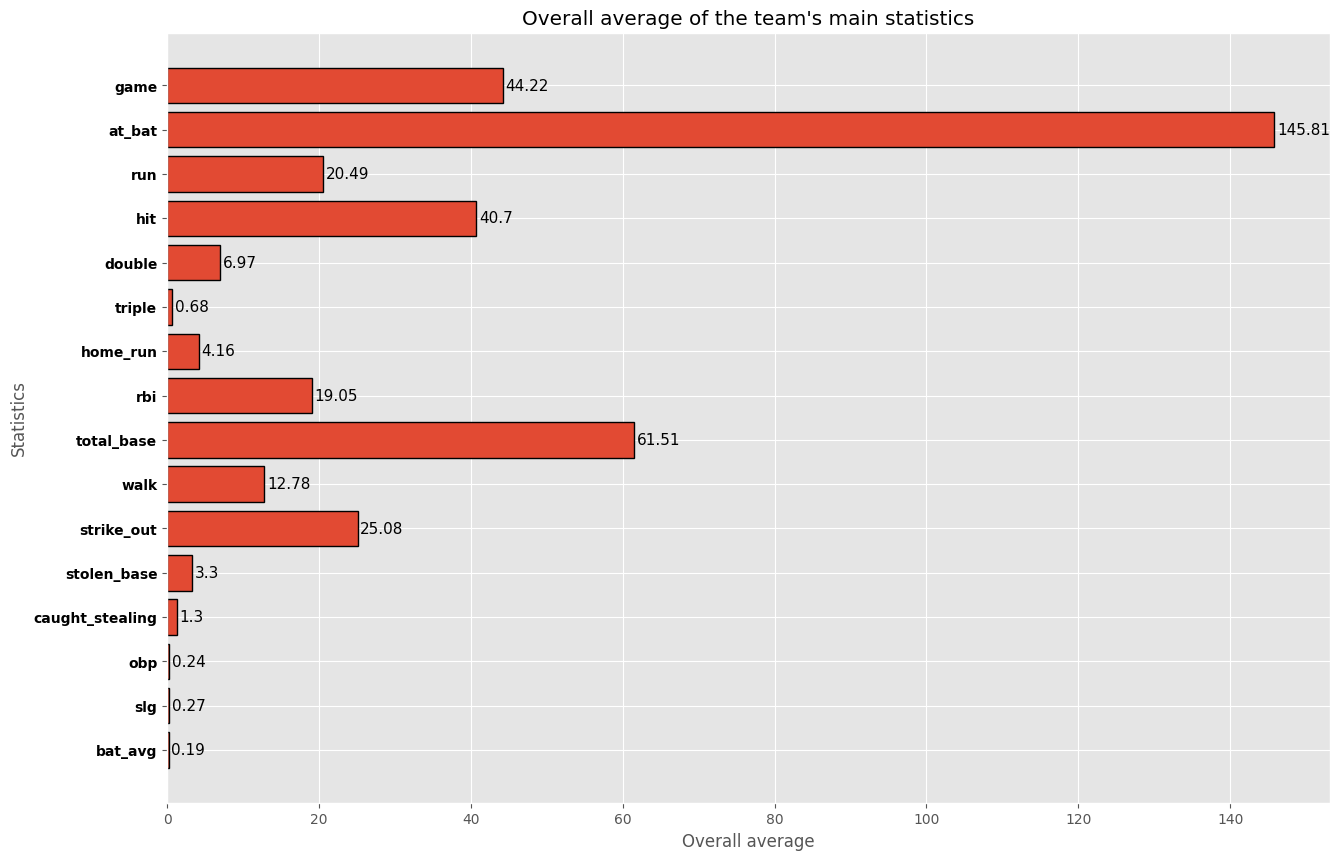

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

texas_rangers.columns[3:]
texas_rangers[texas_rangers.columns[3:]].mean()

graph_stats_tex = ax.barh(texas_rangers.columns[3:], texas_rangers[texas_rangers.columns[3:]].mean(),
        edgecolor="black", linewidth=1.0)

ax.invert_yaxis()
ax.set_title("Overall average of the team's main statistics")
ax.set_ylabel("Statistics")
ax.bar_label(graph_stats_tex, label_type="edge", padding=2, fmt=lambda x: f'{round(x, 2)}', fontsize=11)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(texas_rangers.columns[3:], color="black", fontweight="bold")
ax.set_xlabel("Overall average")

output_folder = "graphs/teams/tex"
filename = "texas-rangers-overall-statistics"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight");

### Chicago White Sox Analysis

Distribution of positions among the players

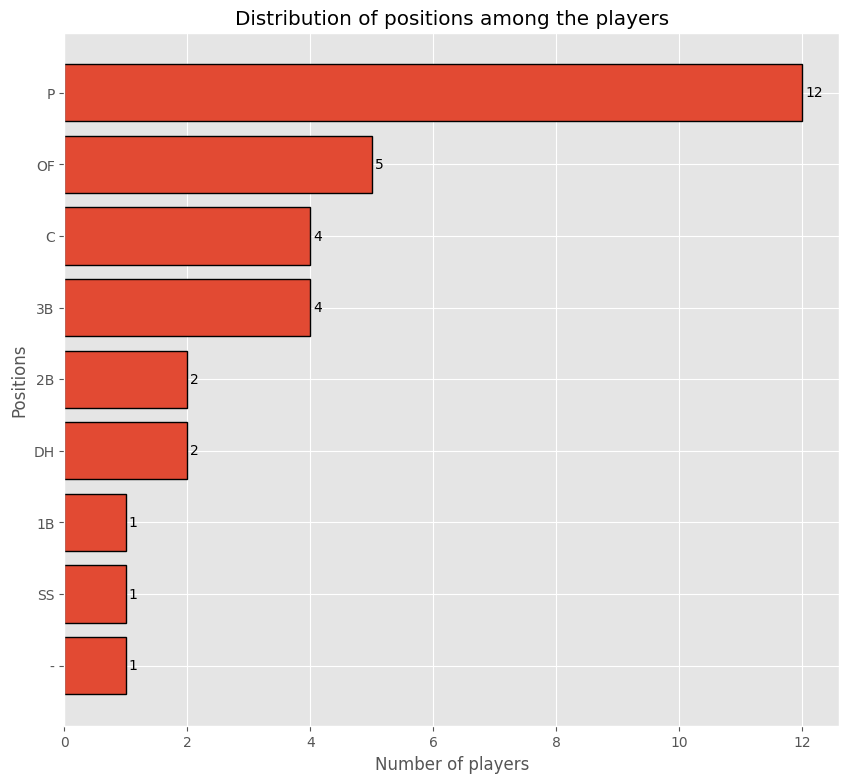

In [22]:
graph_positions("CWS")

Overall average of the team's main statistics

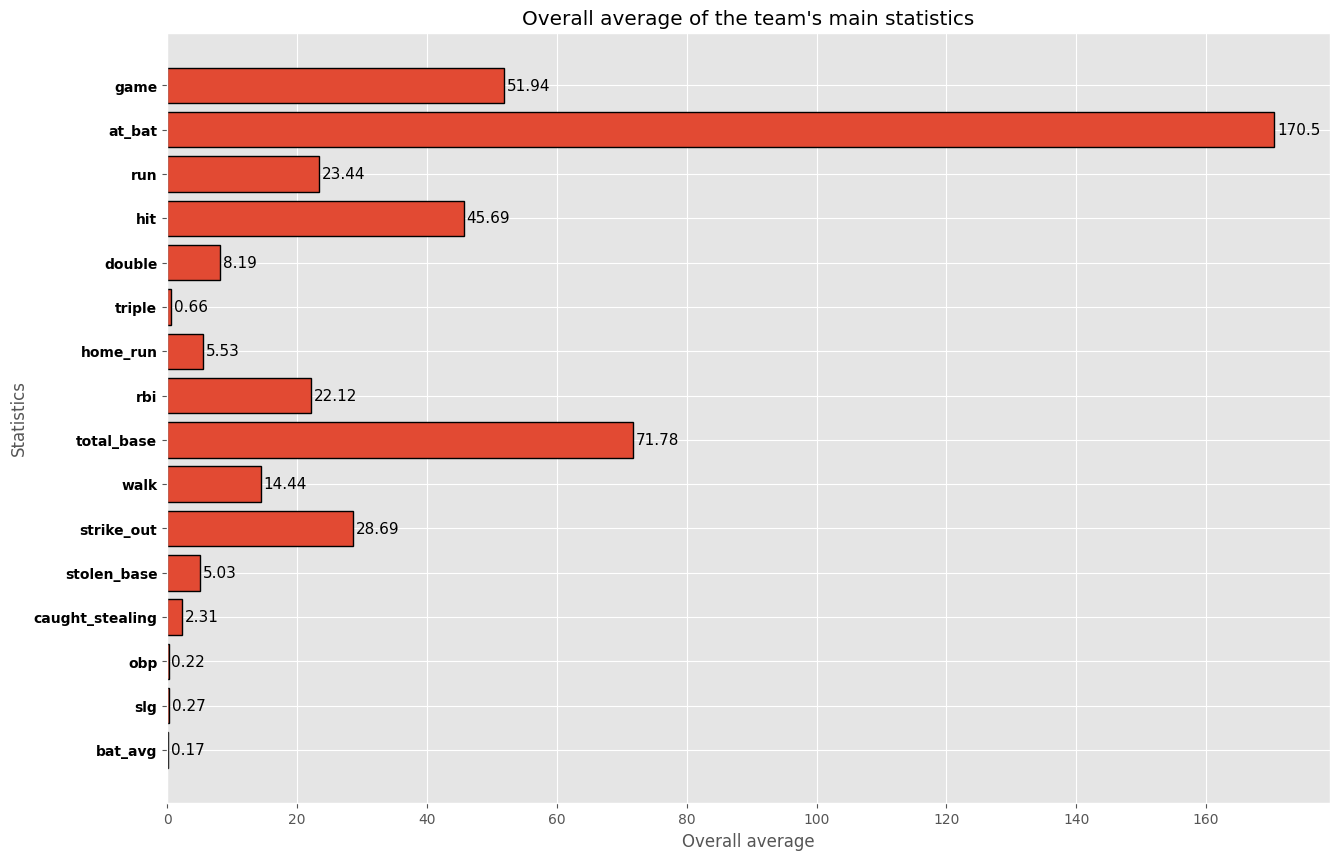

In [23]:
graph_stats_geral("CWS")

### Milwaukee Brewers Analysis

Distribution of positions among the players

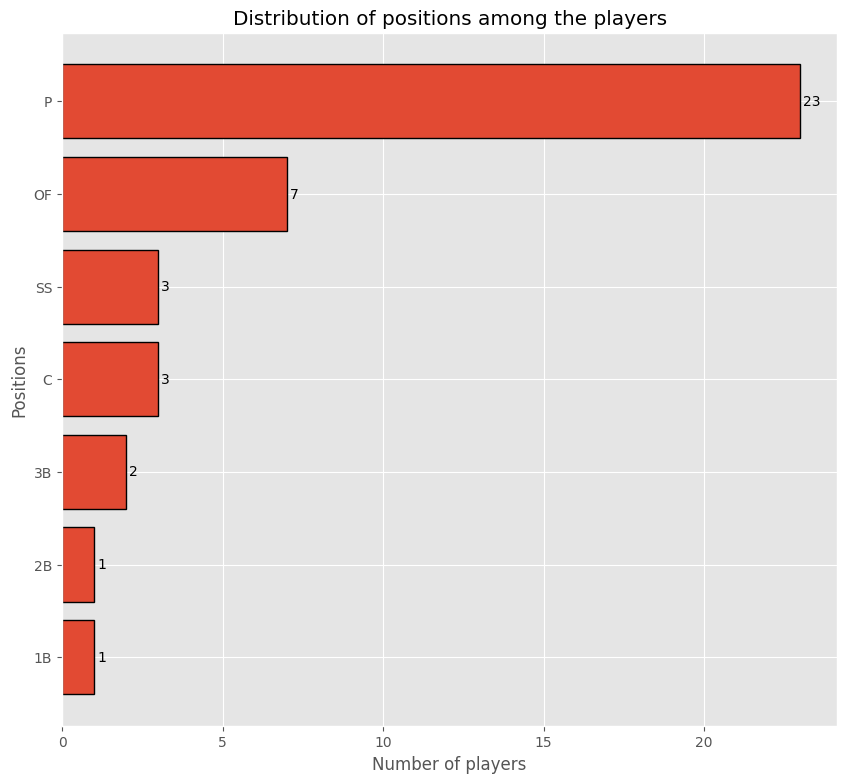

In [24]:
graph_positions("MIL")

Overall average of the team's main statistics

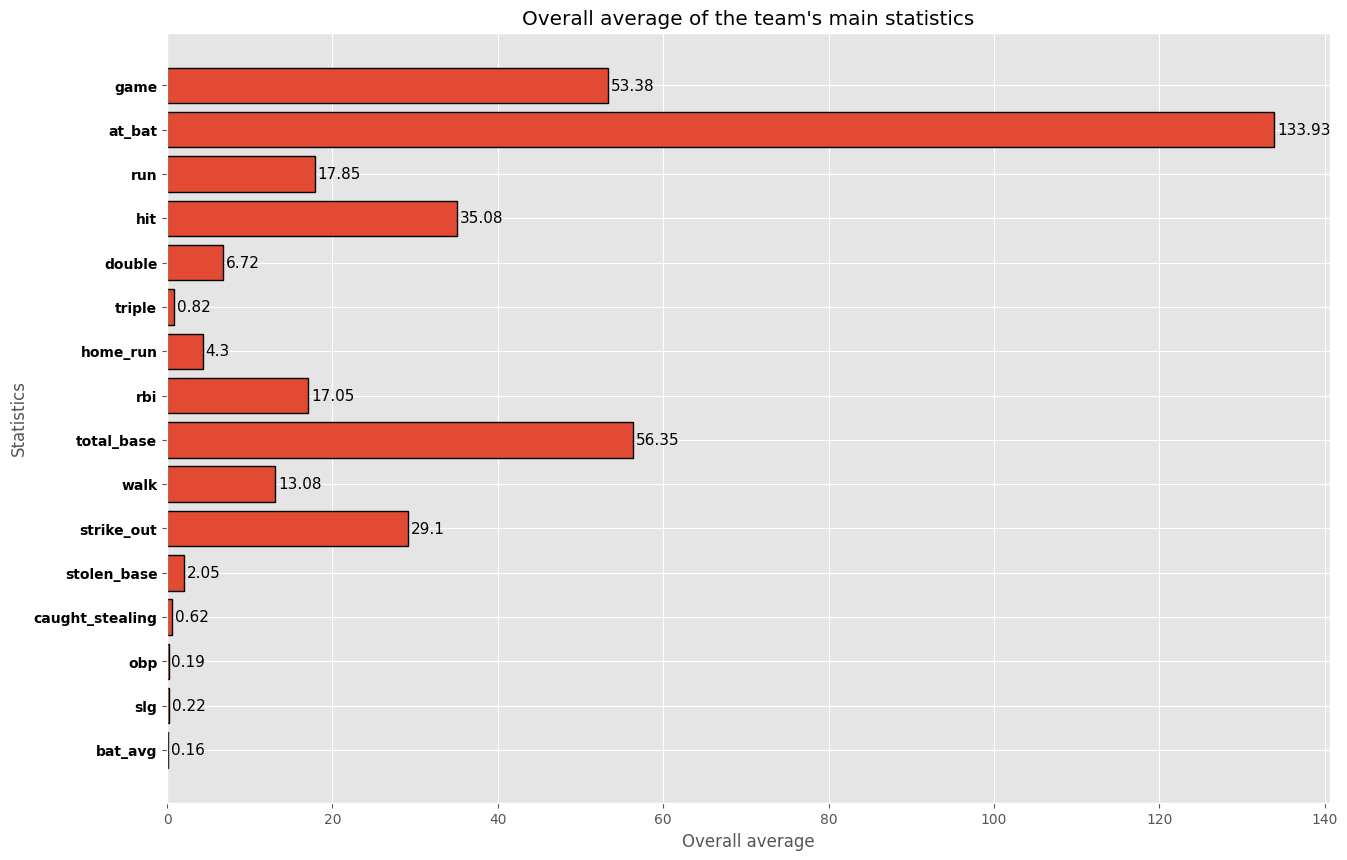

In [25]:
graph_stats_geral("MIL")

### Boston Red Sox Analysis

Distribution of positions among the players

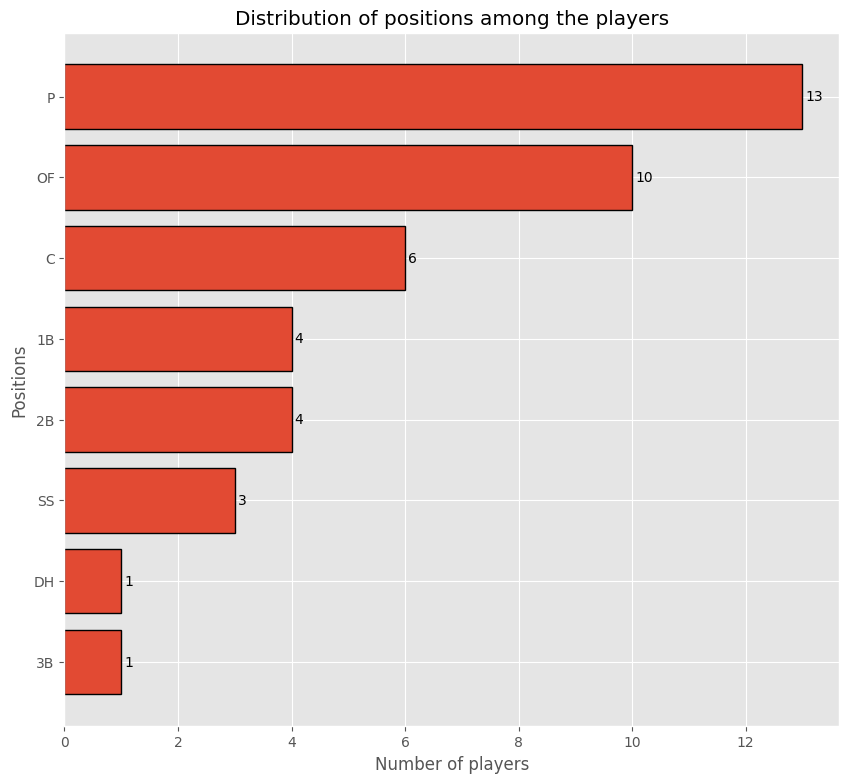

In [26]:
graph_positions("BOS")

Overall average of the team's main statistics

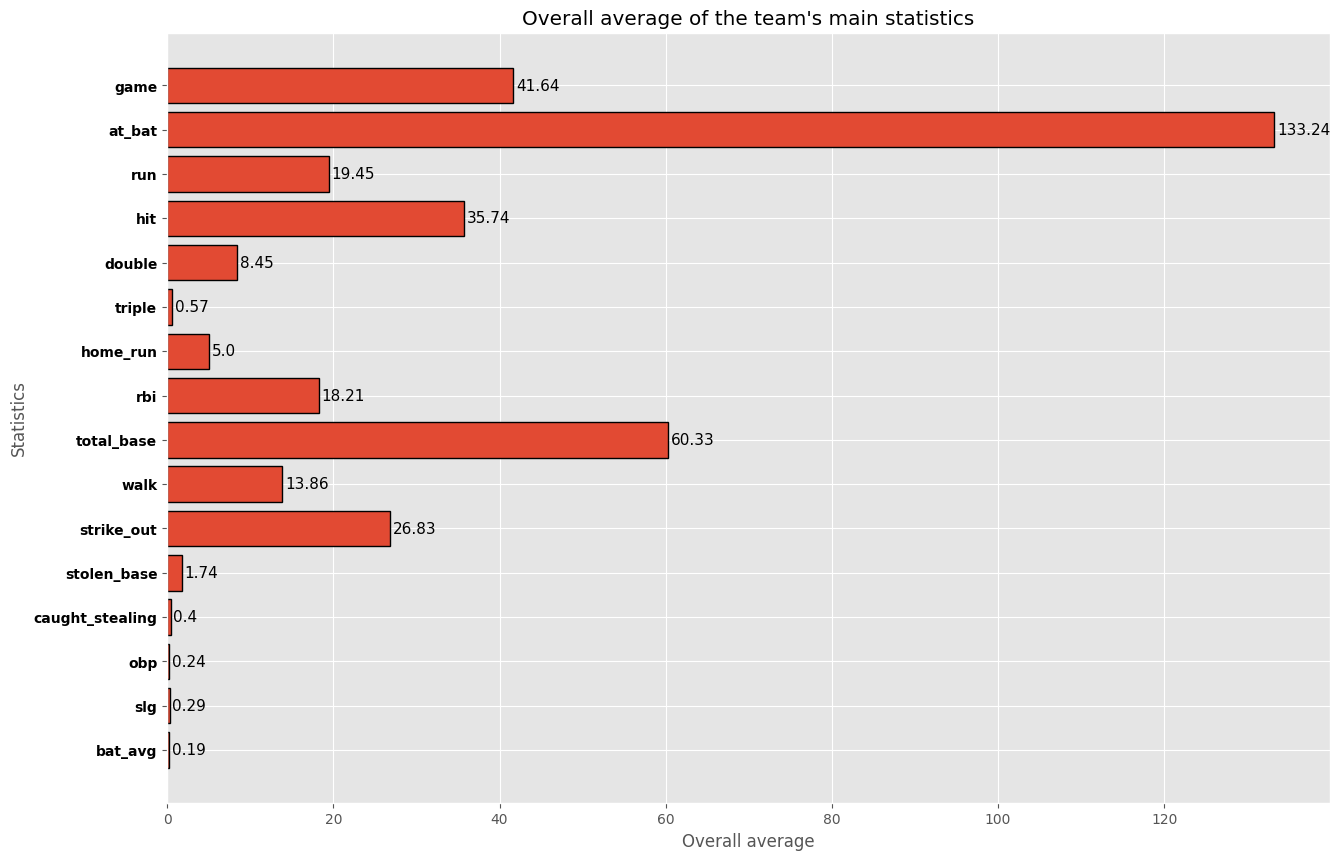

In [27]:
graph_stats_geral("BOS")

### Baltimore Orioles Analysis

Distribution of positions among the players

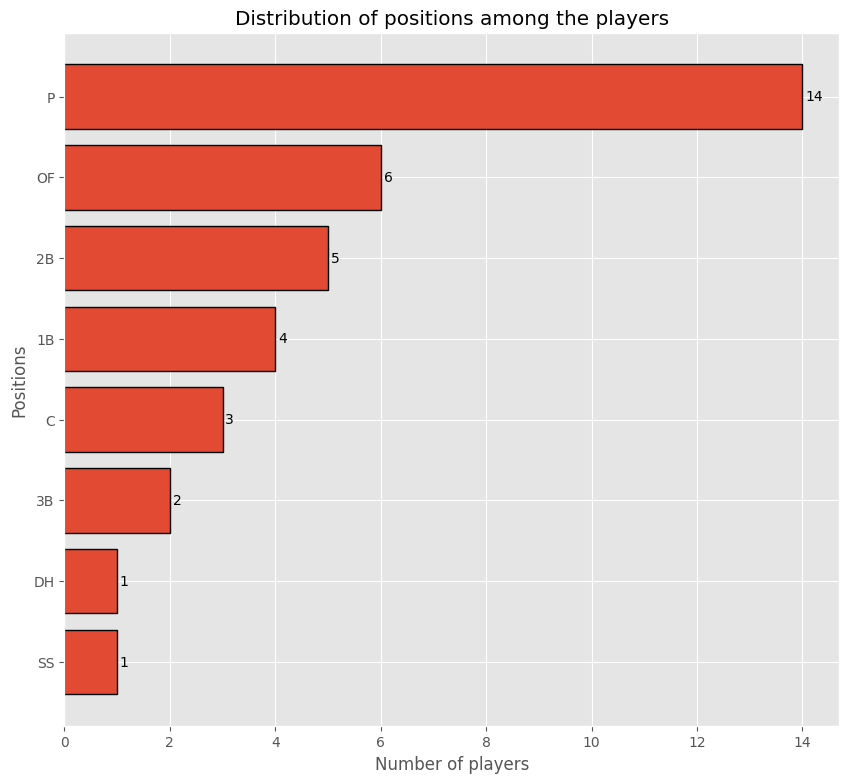

In [28]:
graph_positions("BAL")

Overall average of the team's main statistics

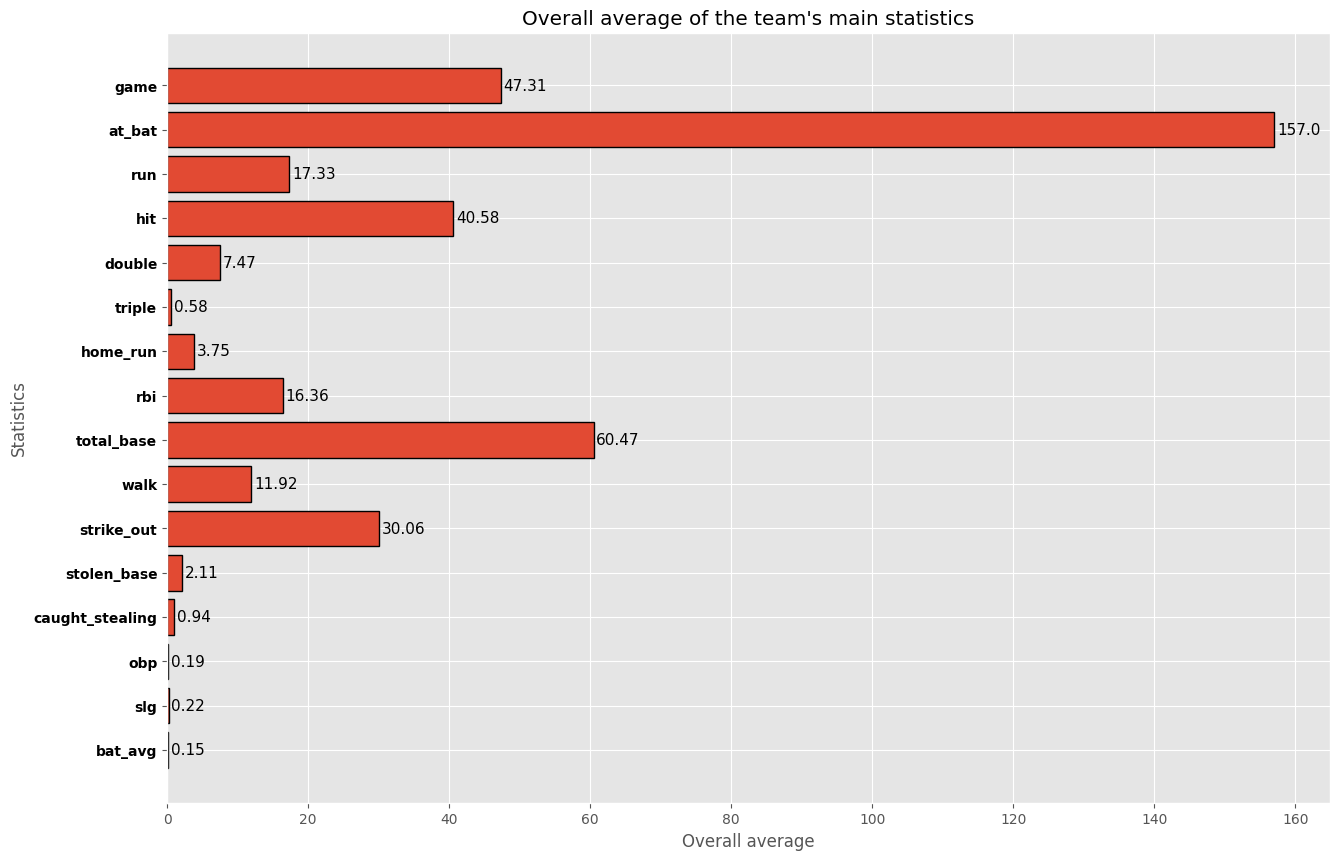

In [29]:
graph_stats_geral("BAL")

### Minnesota Twins Analysis

Distribution of positions among the players

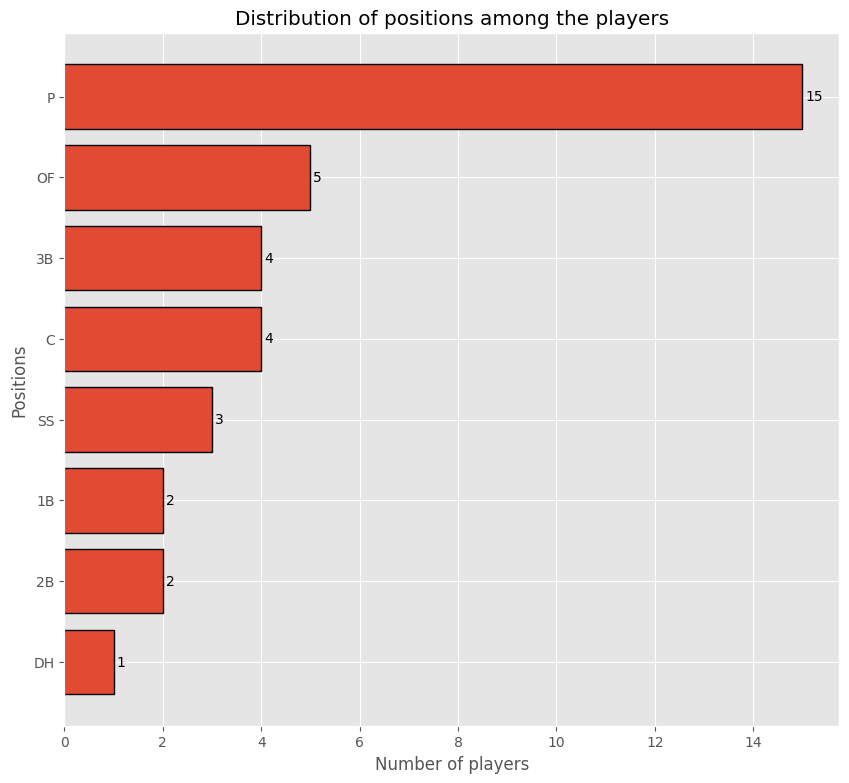

In [30]:
graph_positions("MIN")

Overall average of the team's main statistics

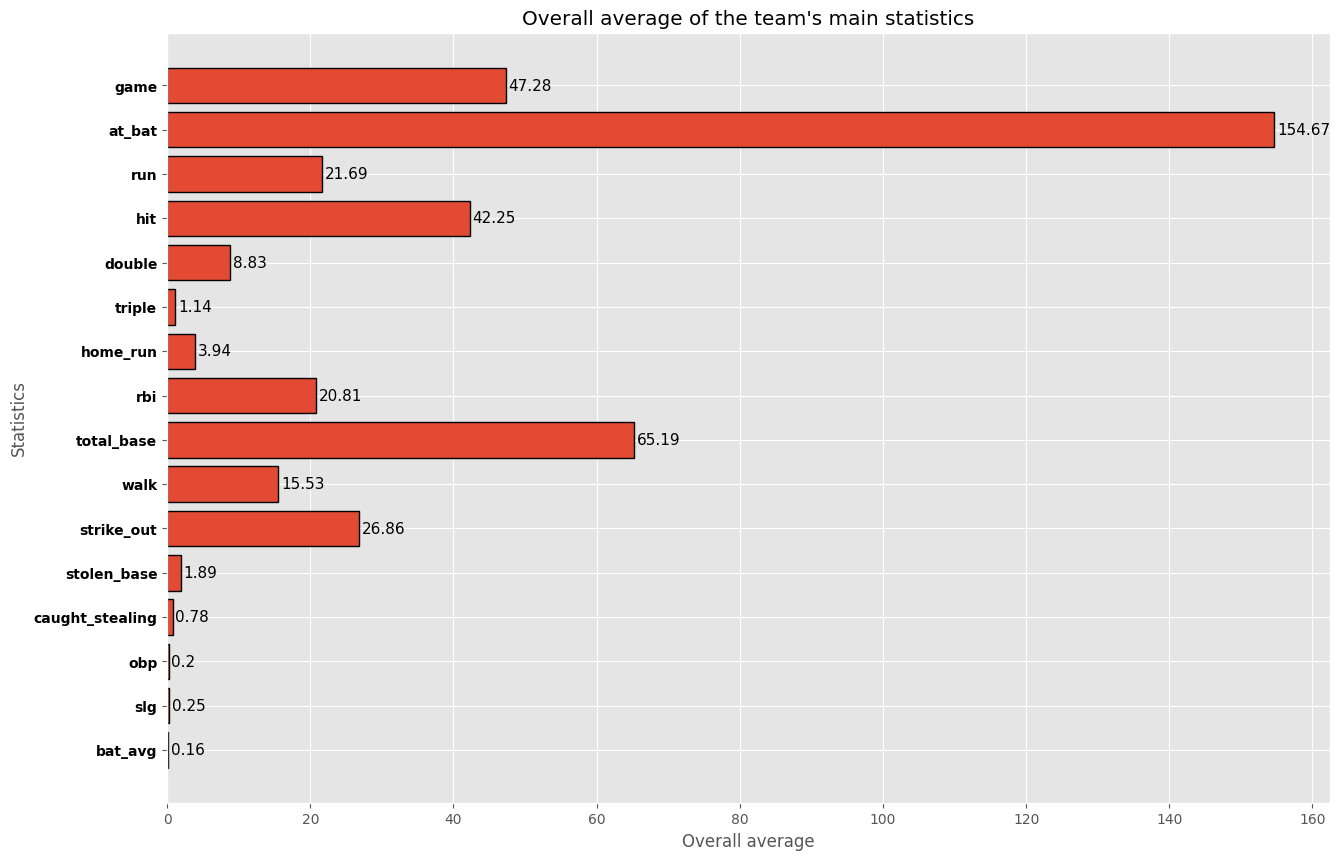

In [31]:
graph_stats_geral("MIN")

### Cincinnati Reds Analysis

Distribution of positions among the players

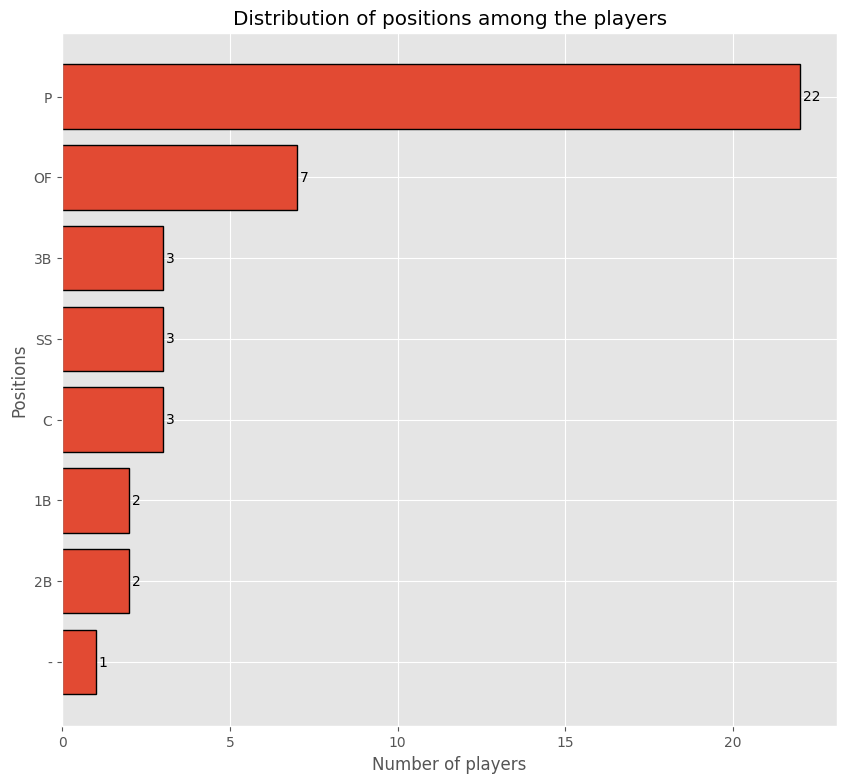

In [32]:
graph_positions("CIN")

Overall average of the team's main statistics

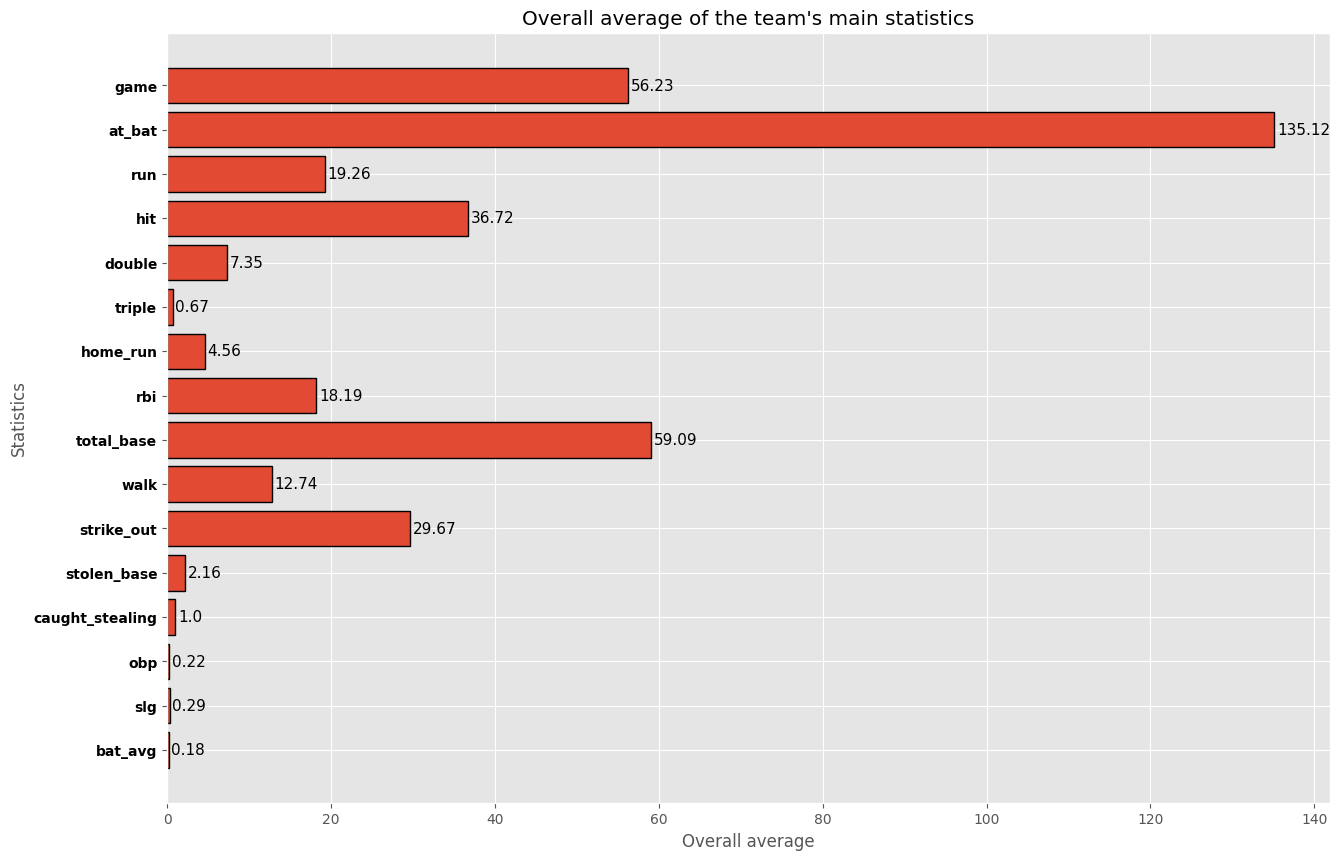

In [33]:
graph_stats_geral("CIN")

### Detroit Tigers Analysis

Distribution of positions among the players

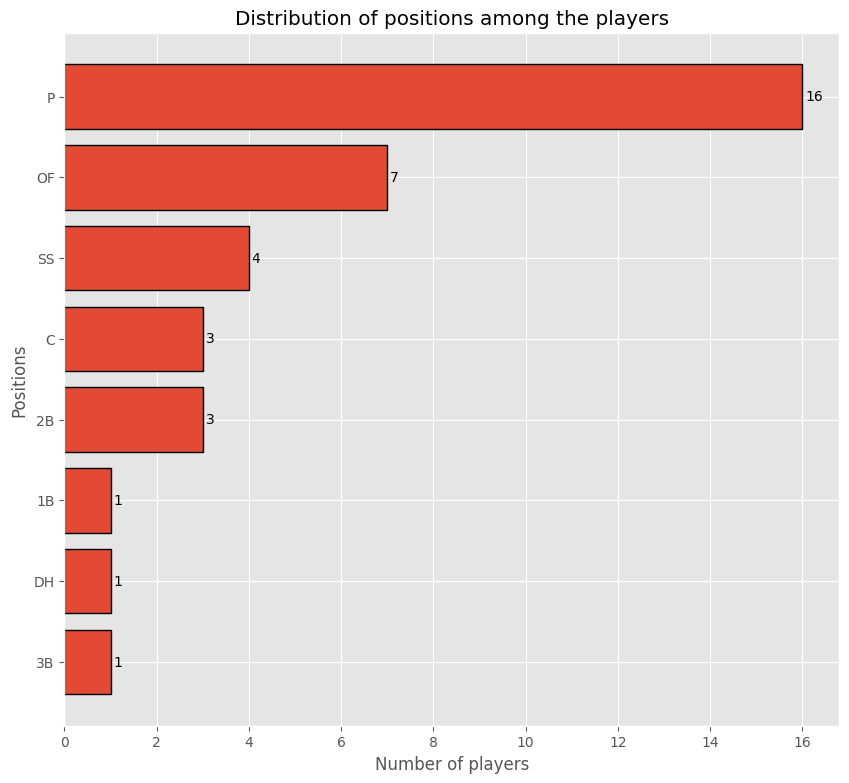

In [34]:
graph_positions("DET")

Overall average of the team's main statistics

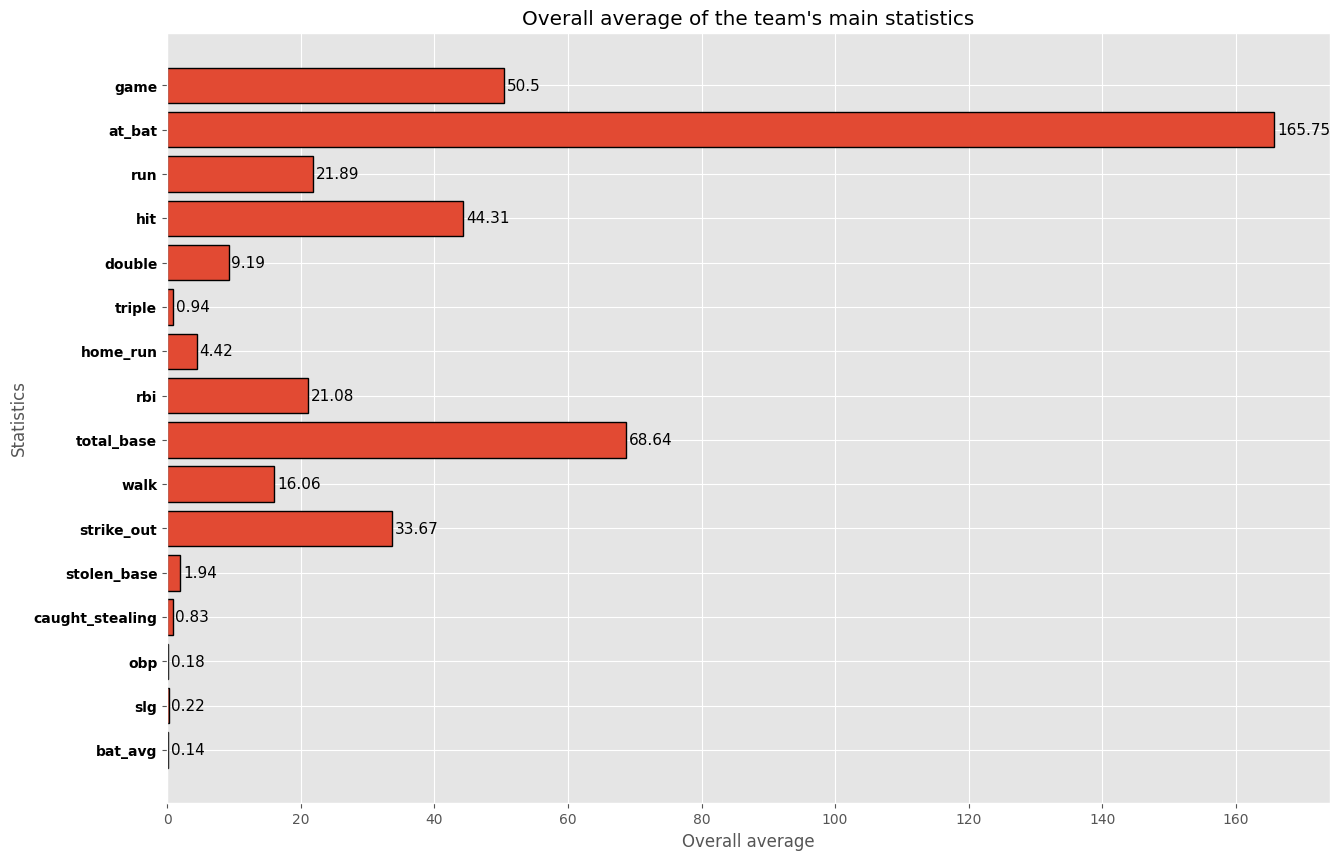

In [35]:
graph_stats_geral("DET")

### Los Angeles Angels Analysis

Distribution of positions among the players

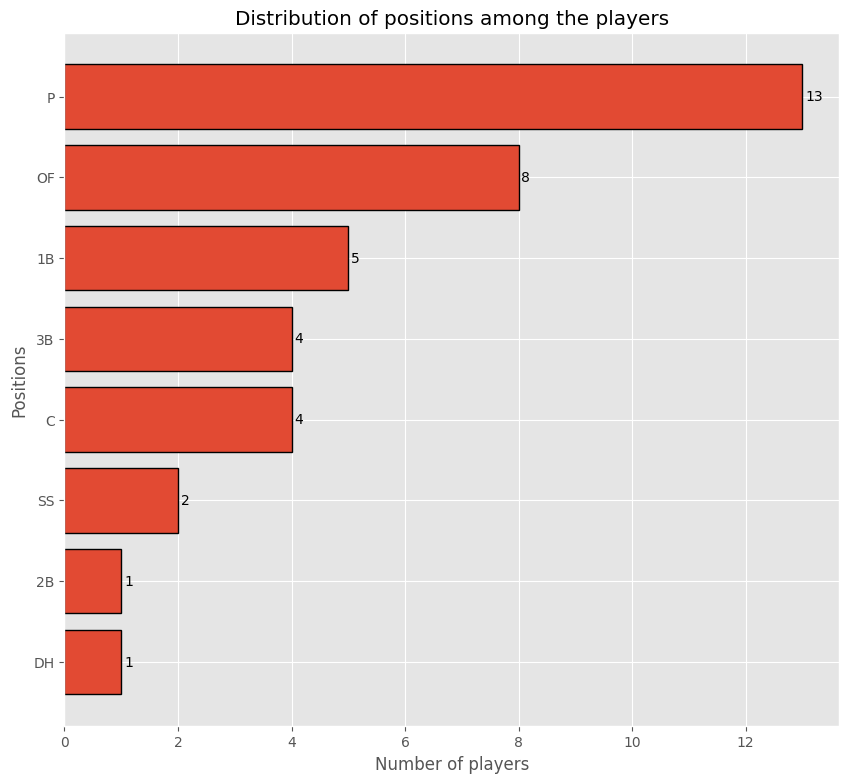

In [36]:
graph_positions("LAA")

Overall average of the team's main statistics

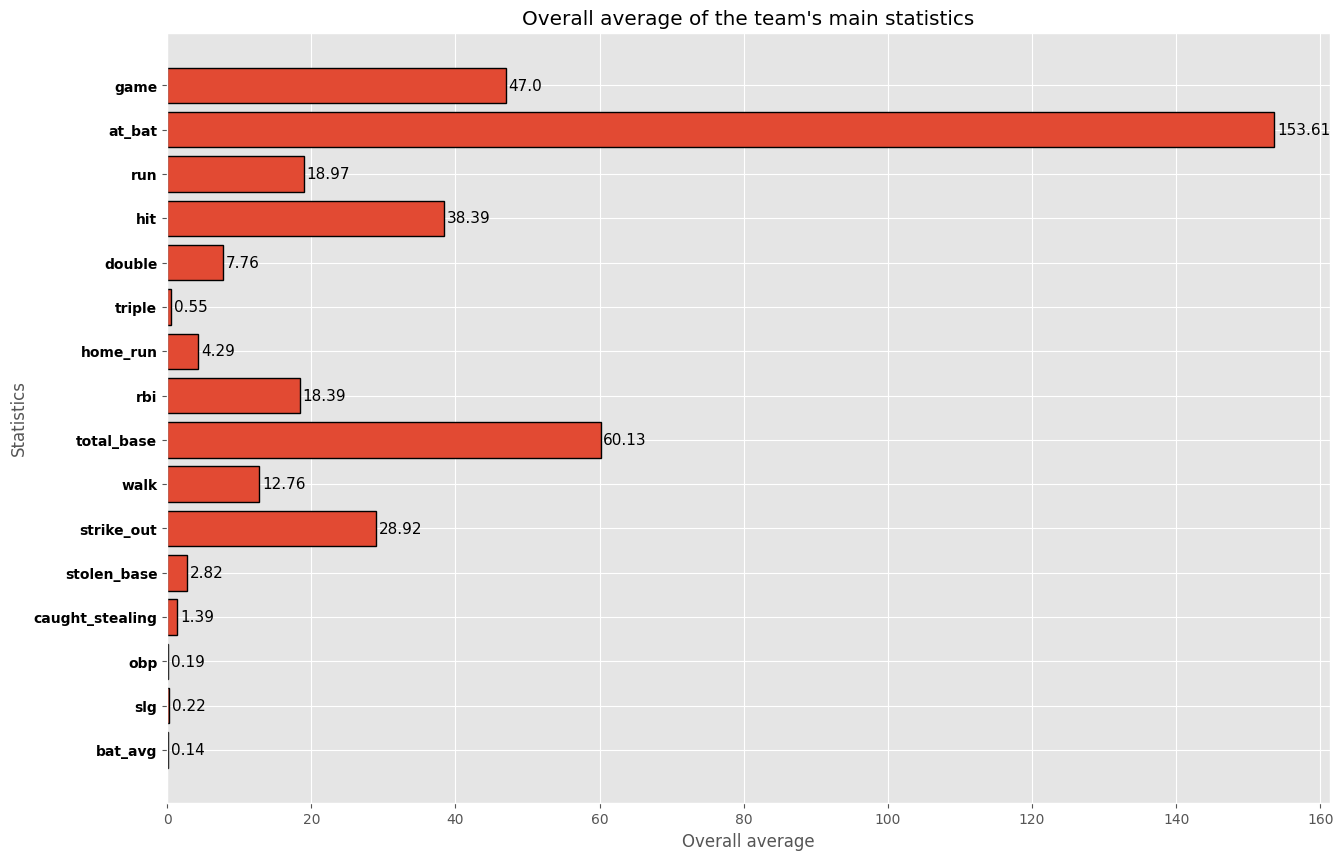

In [37]:
graph_stats_geral("LAA")

### Houston Astros Analysis

Distribution of positions among the players

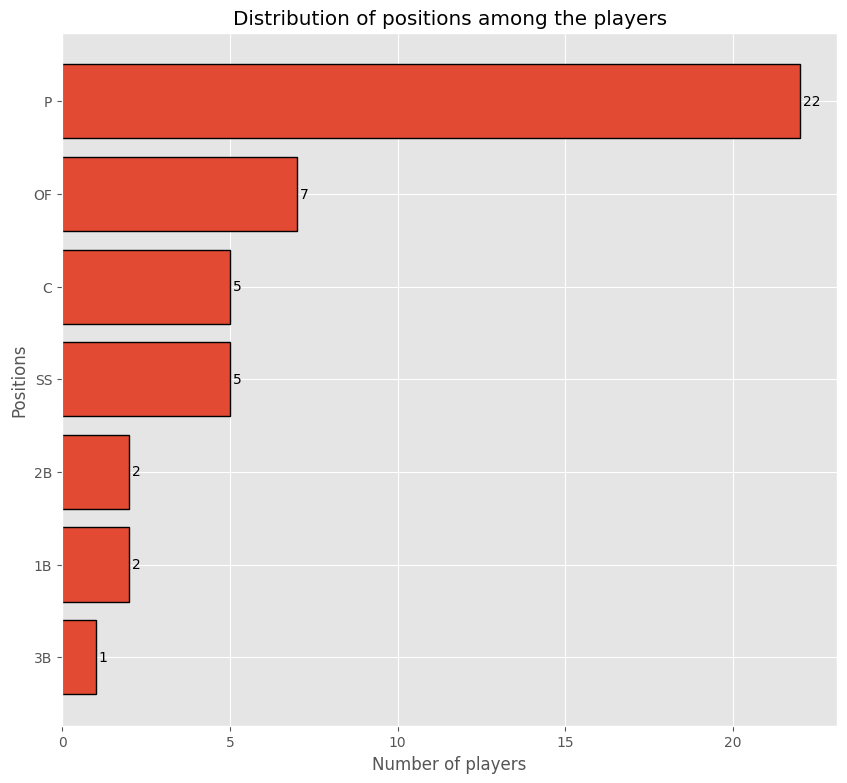

In [38]:
graph_positions("HOU")

Overall average of the team's main statistics

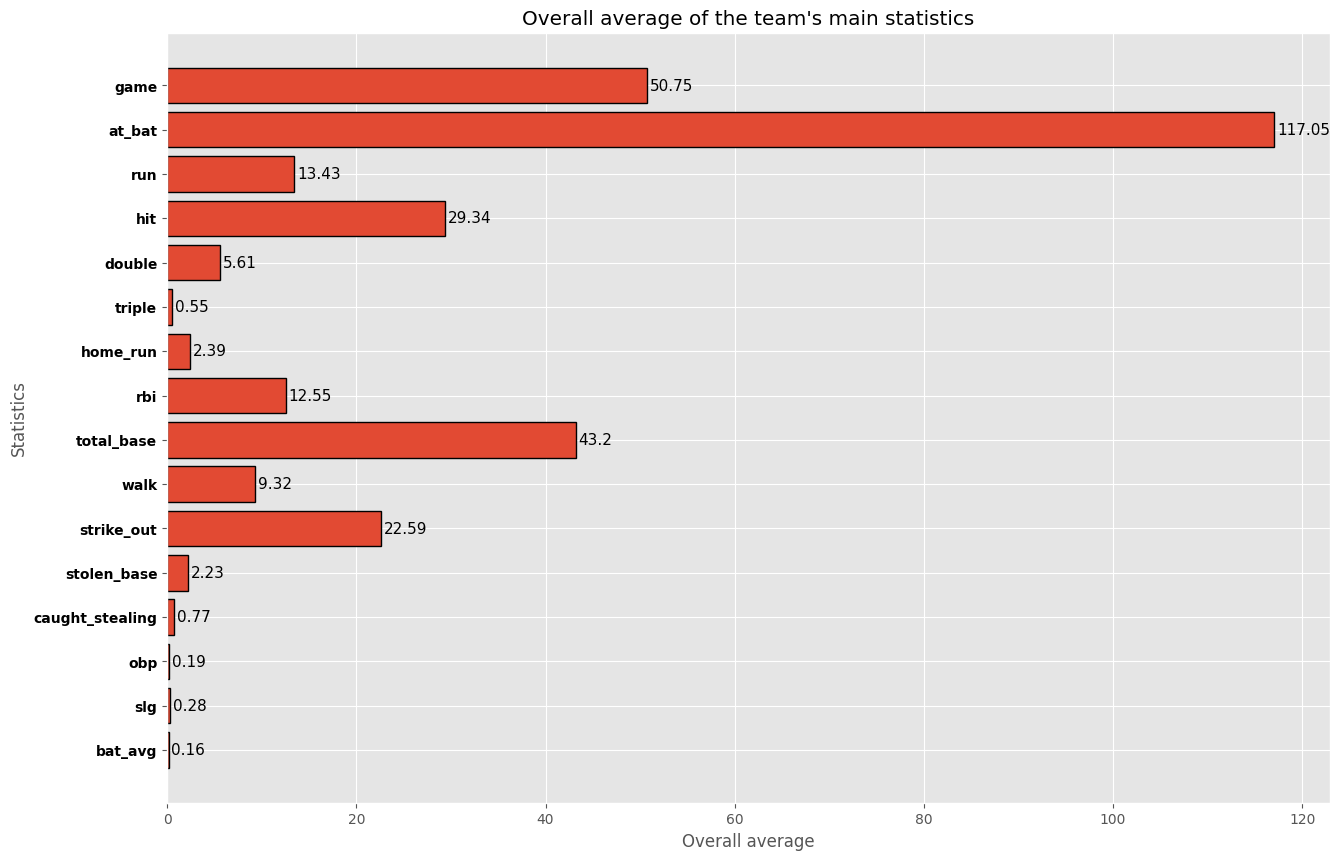

In [39]:
graph_stats_geral("HOU")

### Washington Nationals Analysis

Distribution of positions among the players

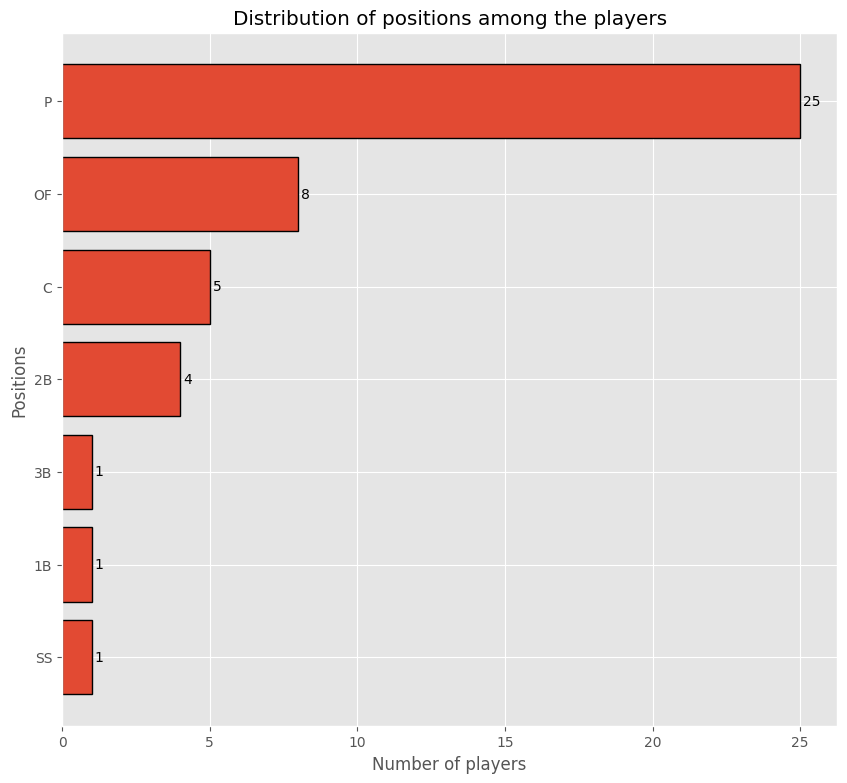

In [40]:
graph_positions("WSH")

Overall average of the team's main statistics

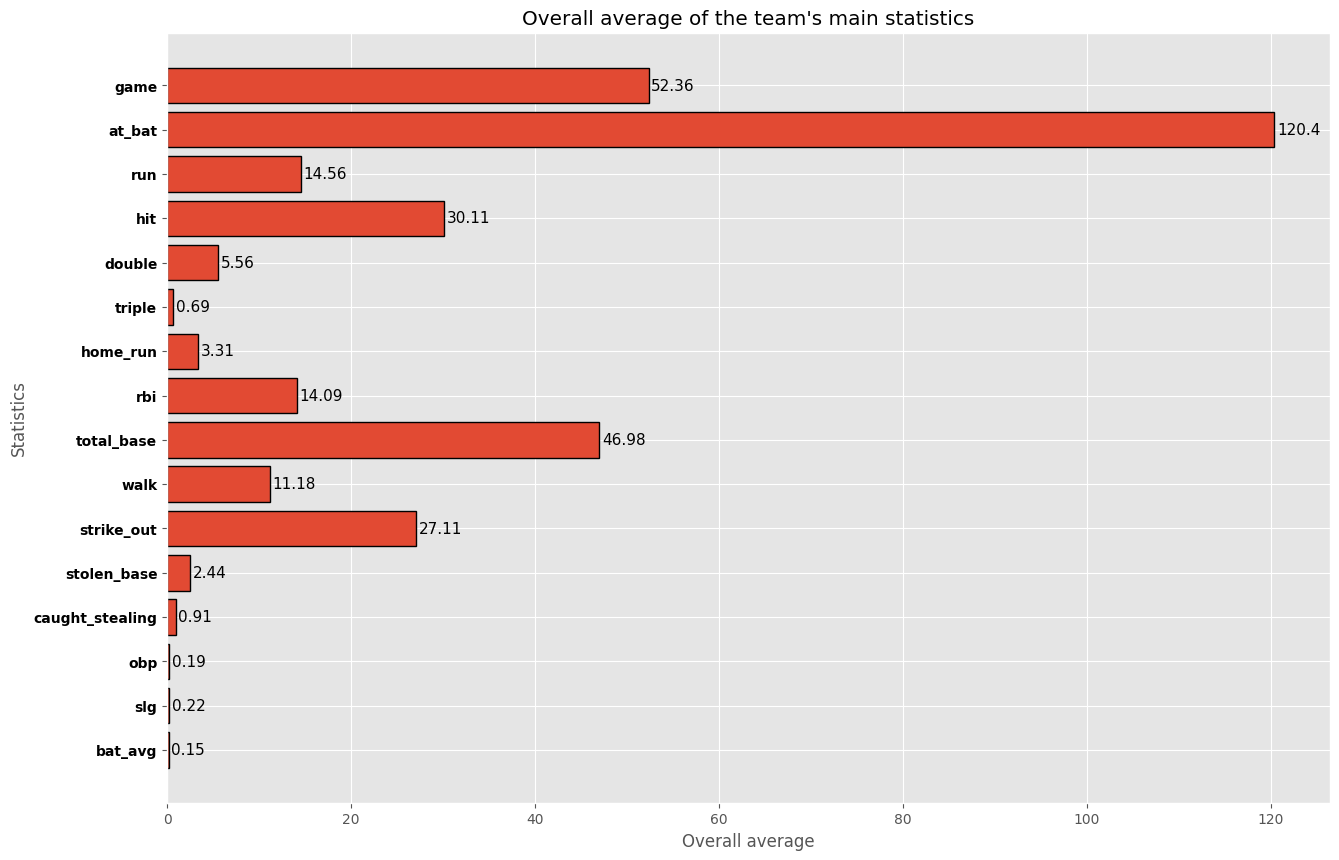

In [56]:
graph_stats_geral("WSH")

### San Francisco Giants Analysis

Distribution of positions among the players

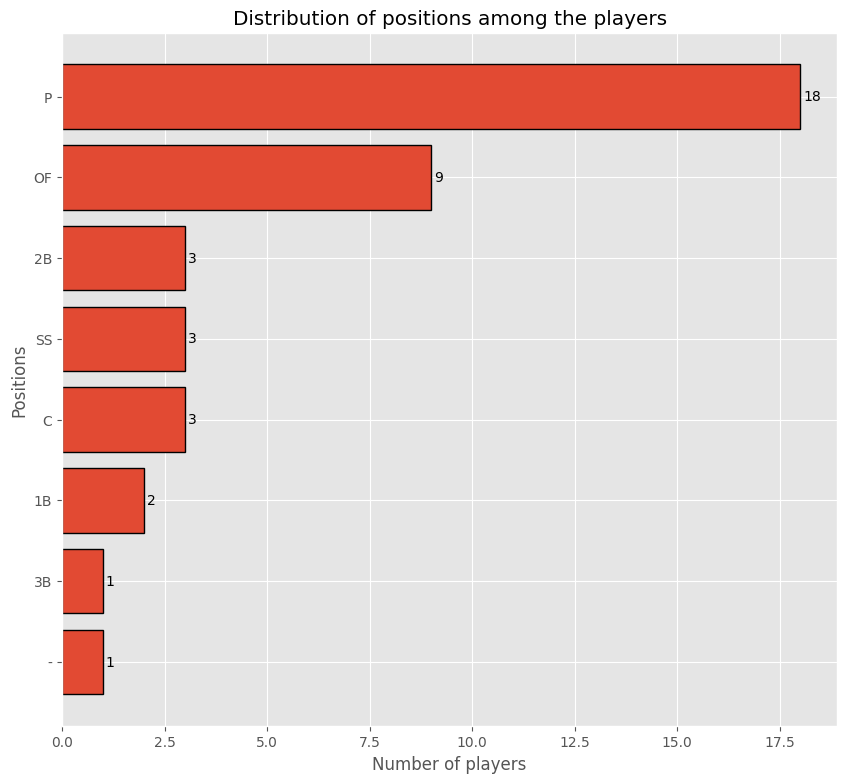

In [57]:
graph_positions("SF")

Overall average of the team's main statistics

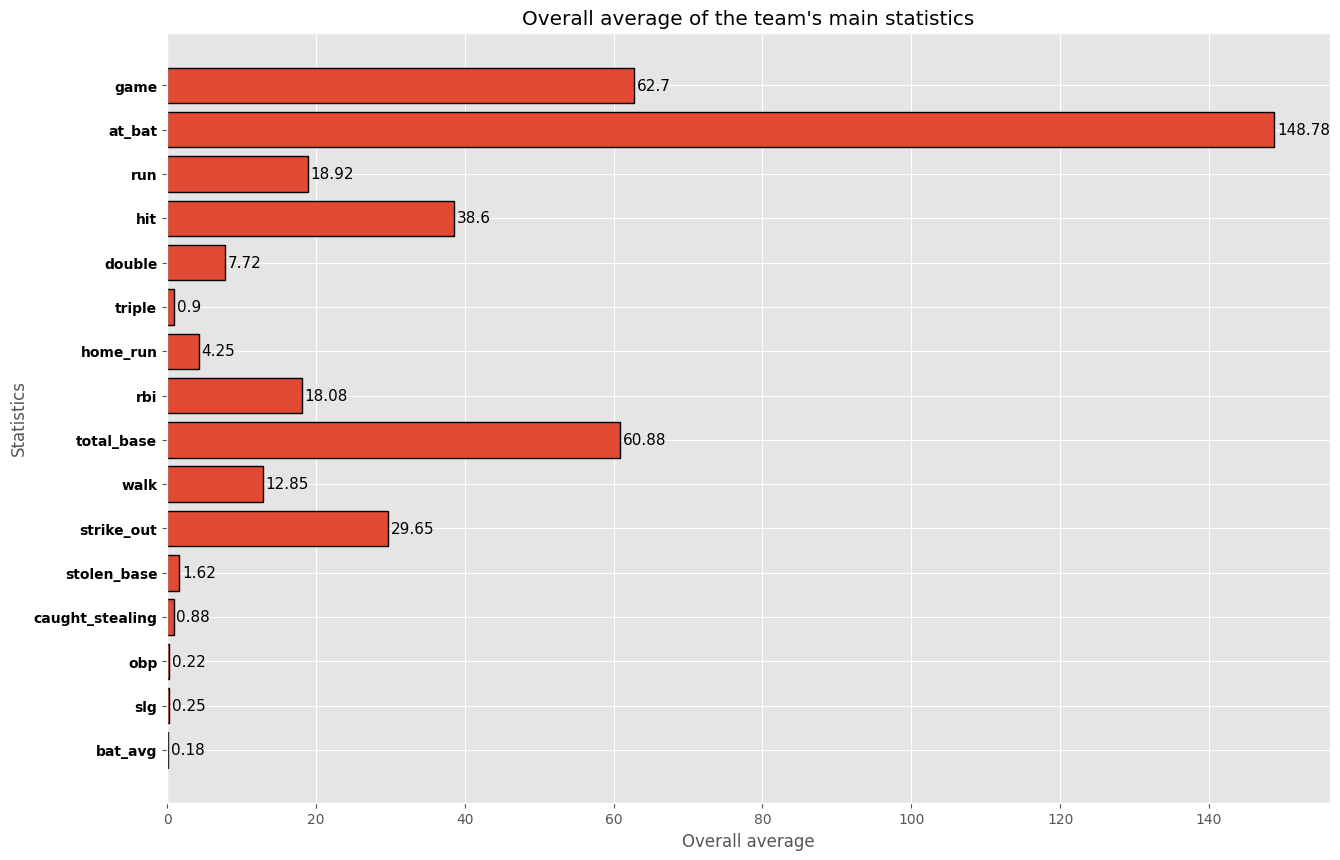

In [58]:
graph_stats_geral("SF")

### Chicago Cubs Analysis

Distribution of positions among the players

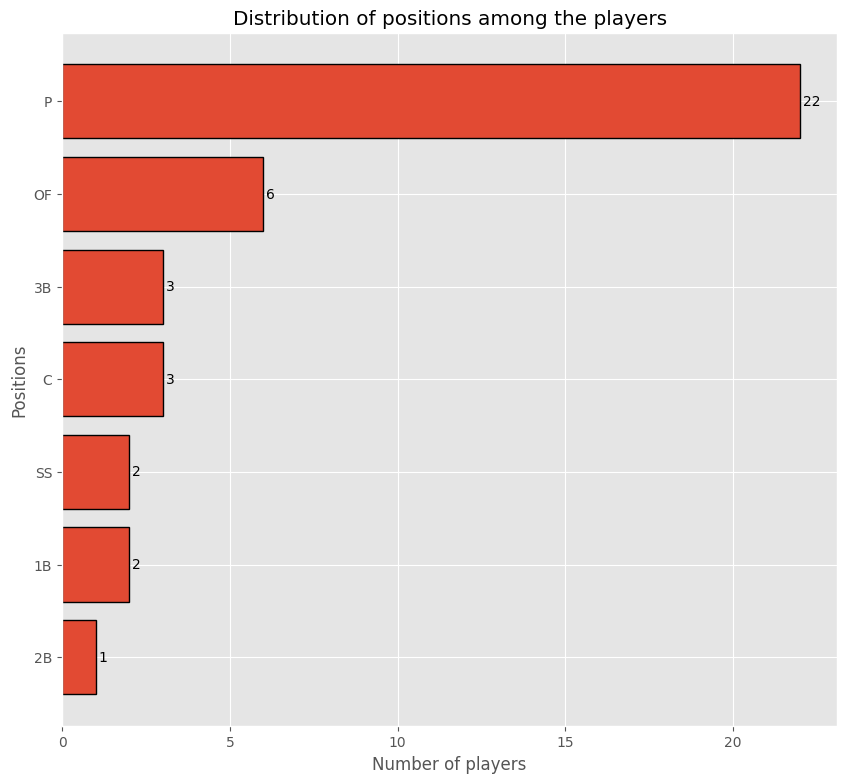

In [61]:
graph_positions("CHC")

Overall average of the team's main statistics

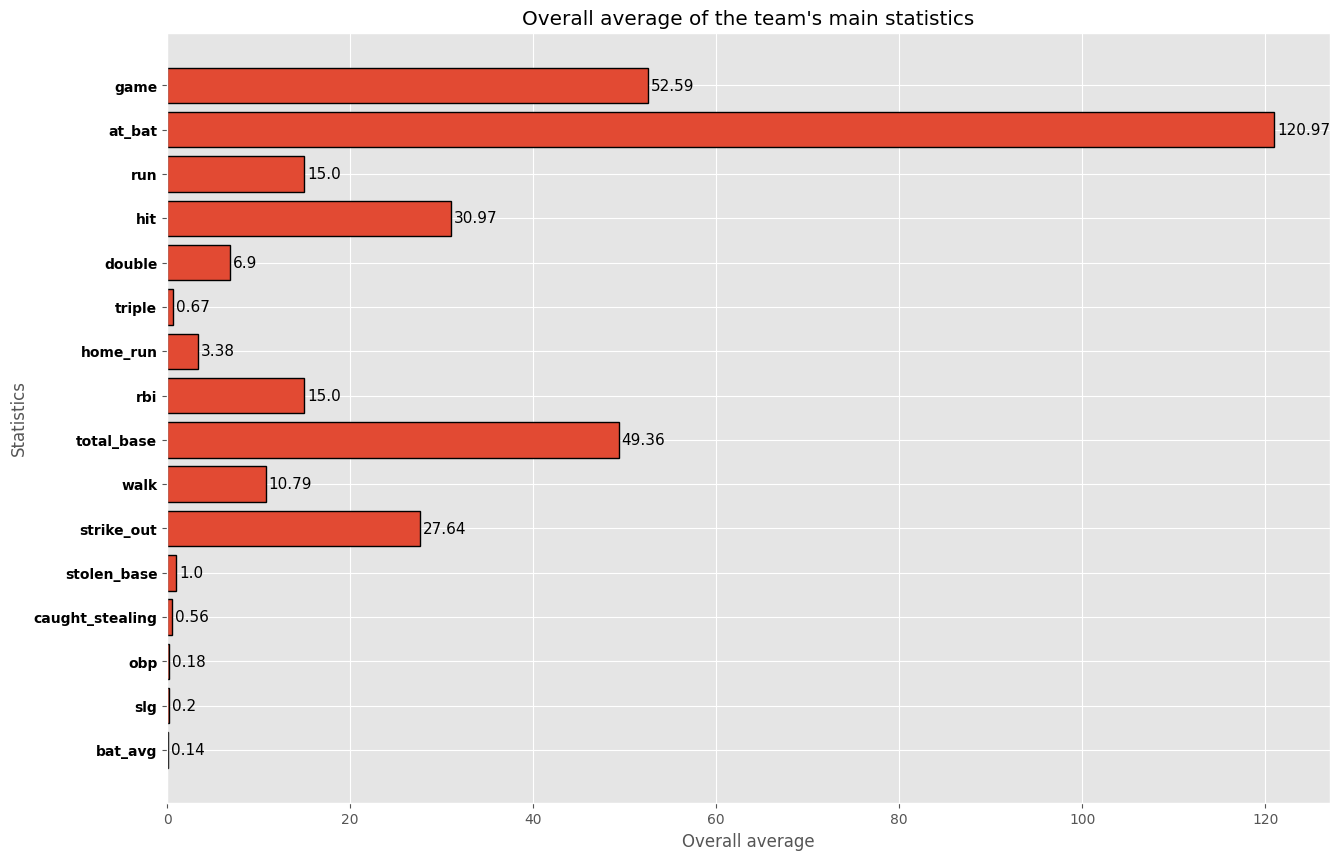

In [62]:
graph_stats_geral("CHC")

### All teams

Looking at all the team statistics.

<Axes: title={'center': 'at bat for each team'}, xlabel='team'>

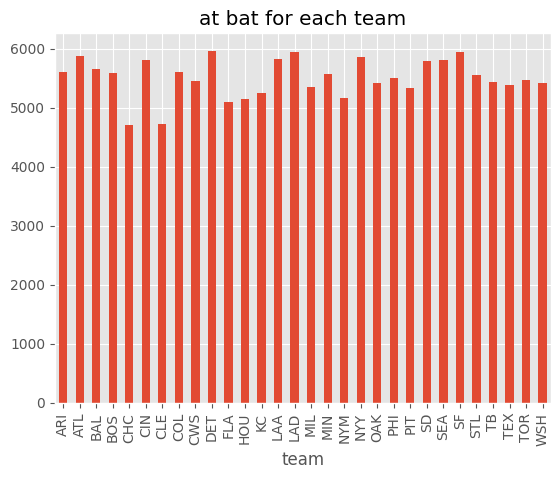

In [41]:
team = dt_baseball.groupby("team")["at_bat"].sum()
team.plot(kind="bar", title="at bat for each team")


<Axes: title={'center': 'runs for each team'}, xlabel='team'>

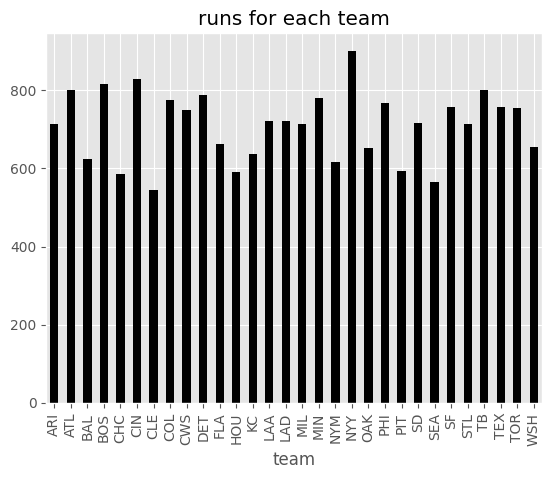

In [42]:
team = dt_baseball.groupby("team")["run"].sum()
team.plot(kind="bar", title="runs for each team", color="black")

<Axes: title={'center': 'hits for each team'}, xlabel='team'>

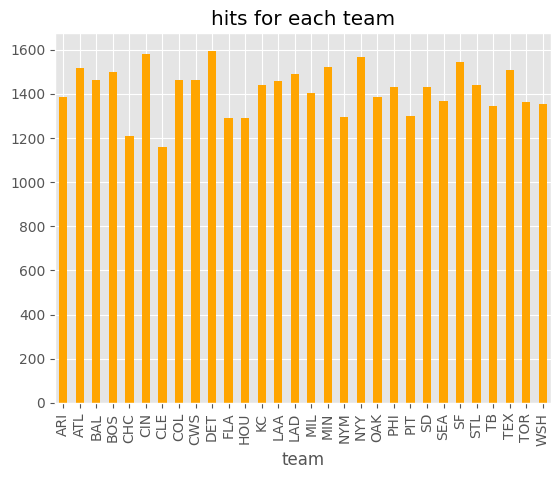

In [43]:
team = dt_baseball.groupby("team")["hit"].sum()
team.plot(kind="bar", title="hits for each team", color="orange")

<Axes: title={'center': 'doubles for each team'}, xlabel='team'>

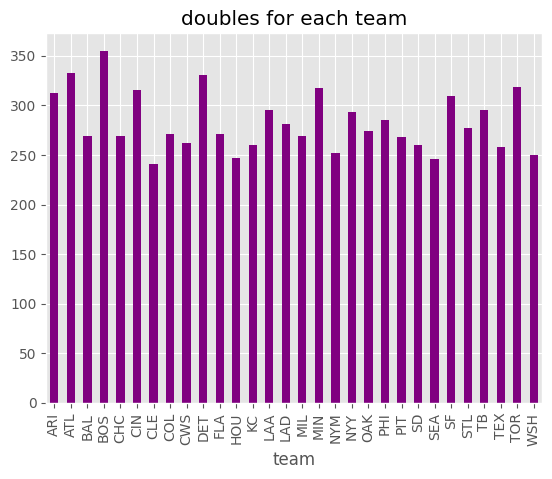

In [44]:
team = dt_baseball.groupby("team")["double"].sum()
team.plot(kind="bar", title="doubles for each team", color="purple")

<Axes: title={'center': 'triples for each team'}, xlabel='team'>

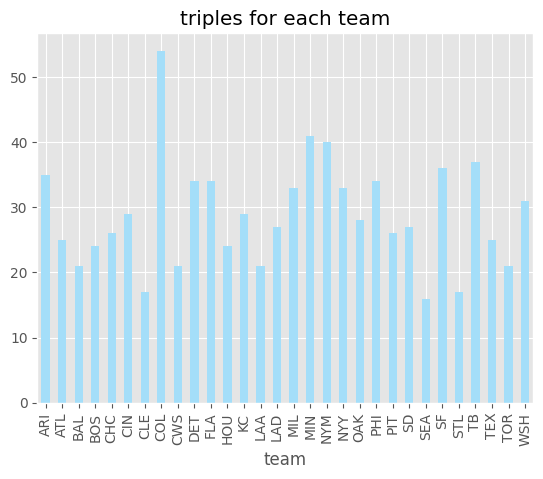

In [45]:
team = dt_baseball.groupby("team")["triple"].sum()
team.plot(kind="bar", title="triples for each team", color="#a4def9")

<Axes: title={'center': 'homeruns for each team'}, xlabel='team'>

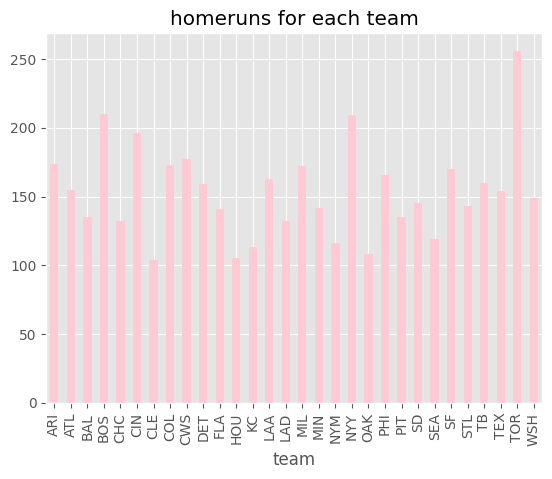

In [46]:
team = dt_baseball.groupby("team")["home_run"].sum()
team.plot(kind="bar", title="homeruns for each team", color="#FFCAD4")

<Axes: title={'center': 'runs batted in for each team'}, xlabel='team'>

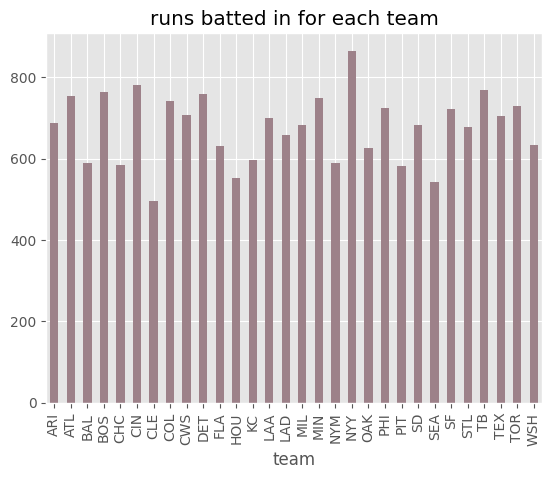

In [47]:
team = dt_baseball.groupby("team")["rbi"].sum()
team.plot(kind="bar", title="runs batted in for each team", color="#9D8189")

<Axes: title={'center': 'total bases for each team'}, xlabel='team'>

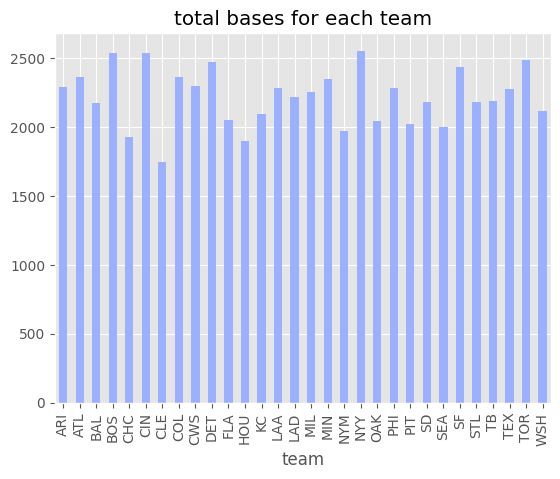

In [48]:
team = dt_baseball.groupby("team")["total_base"].sum()
team.plot(kind="bar", title="total bases for each team", color="#9BB1FF")

<Axes: title={'center': 'walks for each team'}, xlabel='team'>

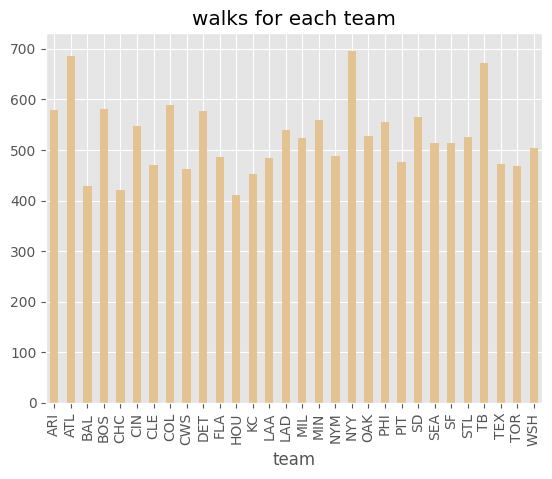

In [49]:
team = dt_baseball.groupby("team")["walk"].sum()
team.plot(kind="bar", title="walks for each team", color="#E2C391")

<Axes: title={'center': 'strike outs for each team'}, xlabel='team'>

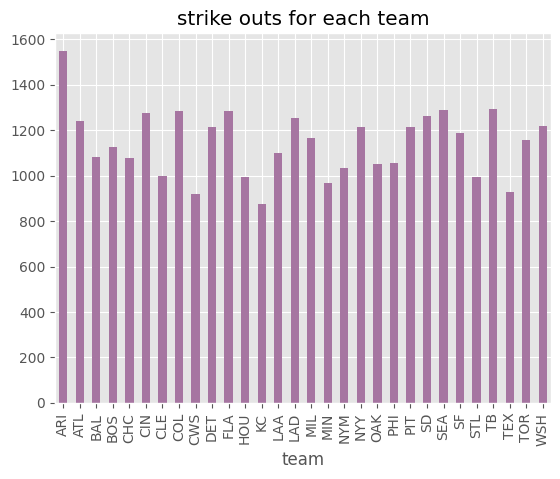

In [50]:
team = dt_baseball.groupby("team")["strike_out"].sum()
team.plot(kind="bar", title="strike outs for each team", color="#A675A1")

<Axes: title={'center': 'stolen bases for each team'}, xlabel='team'>

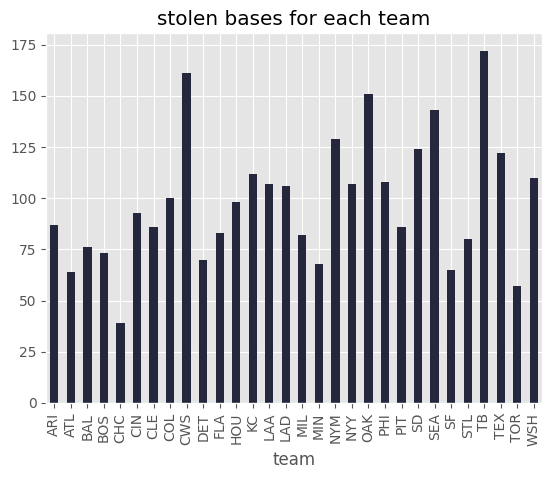

In [51]:
team = dt_baseball.groupby("team")["stolen_base"].sum()
team.plot(kind="bar", title="stolen bases for each team", color="#25283D")

<Axes: title={'center': 'caught stealing for each team'}, xlabel='team'>

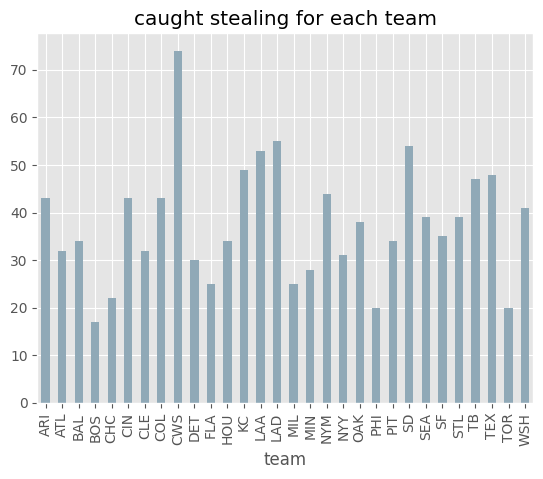

In [52]:
team = dt_baseball.groupby("team")["caught_stealing"].sum()
team.plot(kind="bar", title="caught stealing for each team", color="#90A9B7")

<Axes: title={'center': 'sum of on base percentage for each team'}, xlabel='team'>

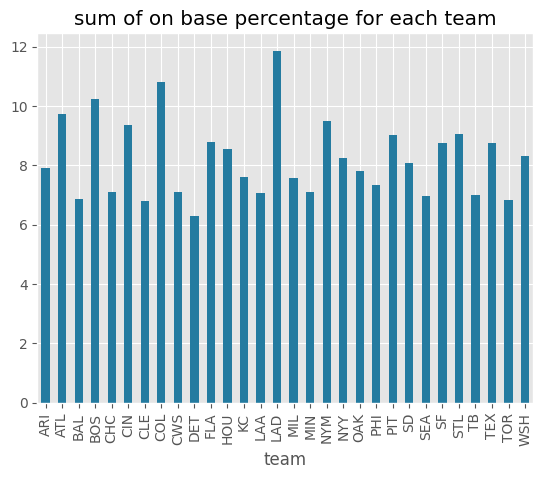

In [53]:
team = dt_baseball.groupby("team")["obp"].sum()
team.plot(kind="bar", title="sum of on base percentage for each team", color="#247BA0")

<Axes: title={'center': 'slugging percentage for each team'}, xlabel='team'>

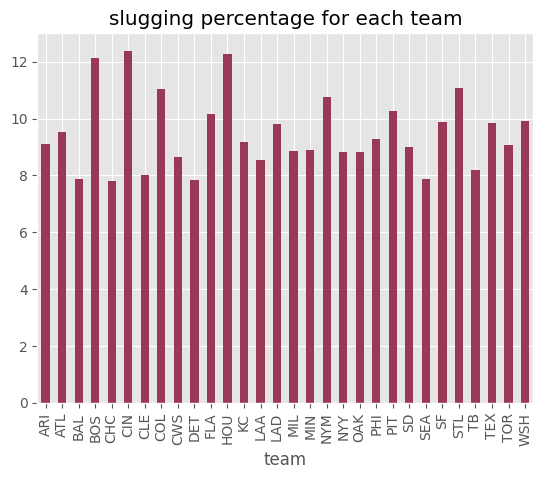

In [54]:
team = dt_baseball.groupby("team")["slg"].sum()
team.plot(kind="bar", title="slugging percentage for each team", color="#993955")

<Axes: title={'center': 'bat average for each team'}, xlabel='team'>

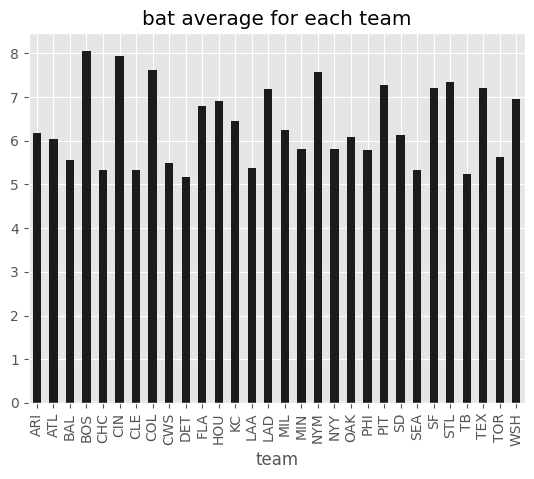

In [55]:
team = dt_baseball.groupby("team")["bat_avg"].sum()
team.plot(kind="bar", title="bat average for each team", color="#1B1B1E")